# IMPORTS:

In [ ]:
!pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045995 sha256=2392a0efbe67368c1fe12c432b95789c85637f7fcce975a14d96ed9ea0fe9cf7
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=480ae49b3b93011d79816d3bf325021d7d036774ec371522a297a2b13bb2d74a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#imports necesarios
import pandas as pd
import numpy as np
from sklearn import svm
from scipy.stats import ttest_rel
from sklearn.svm import LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
from scipy.io.arff import loadarff
import statsmodels.api as sm
from sklearn.utils import resample
import dalex as dx
import seaborn as sns

In [ ]:
# Función para evaluar el signo de los valores
def evaluar_valor(valor):
    if valor >= 0:
        return "Positivo"
    else:
        return "Negativo"

In [ ]:
# Crear las columnas del MultiIndex
columns = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

# Dataset preprocesado:

In [ ]:
#carga del dataset
data=loadarff("/content/drive/MyDrive/TFM/maxwell.arff")
df = pd.DataFrame(data[0])

In [ ]:
pd.set_option('display.max_columns', None)
df.head(20) #comprobar el dataframe

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
0,92.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,16.0,647.0,8.0,7871.0
1,93.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,130.0,9.0,845.0
2,90.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0,2.0,3.0,3.0,8.0,254.0,6.0,2330.0
3,86.0,3.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,2.0,4.0,2.0,2.0,1.0,3.0,5.0,4.0,4.0,5.0,4.0,3.0,2.0,3.0,16.0,1056.0,2.0,21272.0
4,88.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,12.0,383.0,4.0,4224.0
5,92.0,2.0,3.0,1.0,2.0,2.0,1.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,12.0,345.0,8.0,2826.0
6,87.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,4.0,3.0,5.0,4.0,3.0,2.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,2.0,3.0,27.0,209.0,3.0,7320.0
7,86.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,24.0,366.0,2.0,9125.0
8,87.0,2.0,4.0,2.0,2.0,1.0,0.0,2.0,4.0,3.0,3.0,2.0,1.0,2.0,4.0,5.0,3.0,2.0,2.0,2.0,3.0,4.0,2.0,54.0,1181.0,3.0,11900.0
9,87.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,5.0,3.0,4.0,2.0,3.0,2.0,3.0,3.0,13.0,181.0,3.0,4300.0


In [ ]:
#comprobar si existen valores null o ?
print("¿Existen valores nulos?:", df.isnull().values.any())
print("¿Existen valores con '?' ?:", (df == '?').values.any())

¿Existen valores nulos?: False
¿Existen valores con '?' ?: False


In [ ]:
print(df.shape)
#obtener nombre de los atributos
print(list(df))
#obtener lista de atributos sin la variable dependiente
feature_names=list(df)
feature_names.remove('Effort')
print(feature_names)

(62, 27)
['Syear', 'App', 'Har', 'Dba', 'Ifc', 'Source', 'Telonuse', 'Nlan', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'Duration', 'Size', 'Time', 'Effort']
['Syear', 'App', 'Har', 'Dba', 'Ifc', 'Source', 'Telonuse', 'Nlan', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'Duration', 'Size', 'Time']


In [ ]:
df.info() #comprobar el tipo de variables y su cantidad. Parece que no hay ninguna variable objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Syear     62 non-null     float64
 1   App       62 non-null     float64
 2   Har       62 non-null     float64
 3   Dba       62 non-null     float64
 4   Ifc       62 non-null     float64
 5   Source    62 non-null     float64
 6   Telonuse  62 non-null     float64
 7   Nlan      62 non-null     float64
 8   T01       62 non-null     float64
 9   T02       62 non-null     float64
 10  T03       62 non-null     float64
 11  T04       62 non-null     float64
 12  T05       62 non-null     float64
 13  T06       62 non-null     float64
 14  T07       62 non-null     float64
 15  T08       62 non-null     float64
 16  T09       62 non-null     float64
 17  T10       62 non-null     float64
 18  T11       62 non-null     float64
 19  T12       62 non-null     float64
 20  T13       62 non-null     float64


In [ ]:
df.describe() #obtener algunas estadísitcas de cada atributo

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,89.580645,2.354839,2.612903,1.032258,1.935484,1.870968,0.241935,2.548387,3.048387,3.048387,3.032258,3.193548,3.048387,2.903226,3.241935,3.806452,4.064516,3.612903,3.419355,3.822581,3.064516,3.258065,3.338710,17.209677,673.306452,5.580645,8223.209677
std,2.131331,0.993368,0.997617,0.442339,0.247676,0.337972,0.431751,1.019119,0.998809,0.711208,0.886469,0.697506,0.711208,0.694467,0.899644,0.955377,0.743738,0.893599,0.984276,0.690075,0.955930,1.007114,0.745336,10.651156,784.084505,2.131331,10499.903168
min,85.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,48.000000,1.000000,583.000000
25%,88.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,10.000000,232.500000,4.000000,2388.750000
50%,90.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,13.500000,385.000000,6.000000,5189.500000
75%,91.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.500000,640.750000,7.000000,9308.000000
max,93.000000,5.000000,5.000000,4.000000,2.000000,2.000000,1.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,54.000000,3643.000000,9.000000,63694.000000


In [ ]:
correlation_matrix=df.corr()
print(correlation_matrix) #coeficientes de correlación

             Syear       App       Har       Dba       Ifc    Source  \
Syear     1.000000 -0.160855  0.130573 -0.054970 -0.145259 -0.053592   
App      -0.160855  1.000000  0.025080 -0.213018  0.227835  0.040953   
Har       0.130573  0.025080  1.000000  0.288806 -0.235426 -0.588159   
Dba      -0.054970 -0.213018  0.288806  1.000000  0.019308 -0.081358   
Ifc      -0.145259  0.227835 -0.235426  0.019308  1.000000  0.486446   
Source   -0.053592  0.040953 -0.588159 -0.081358  0.486446  1.000000   
Telonuse  0.450547 -0.012330 -0.083487 -0.041535  0.148359  0.217443   
Nlan      0.334031  0.015149  0.034849  0.032846 -0.117324 -0.029171   
T01       0.117500 -0.331517  0.298793  0.219039 -0.185978 -0.418269   
T02      -0.051284  0.091319 -0.065589 -0.109262  0.297210  0.231004   
T03      -0.174934  0.135720 -0.022723 -0.086312 -0.214364 -0.204749   
T04       0.198848 -0.053425 -0.102596 -0.179968  0.168360  0.107676   
T05       0.316423 -0.117517 -0.111799 -0.057153 -0.447316 -0.24

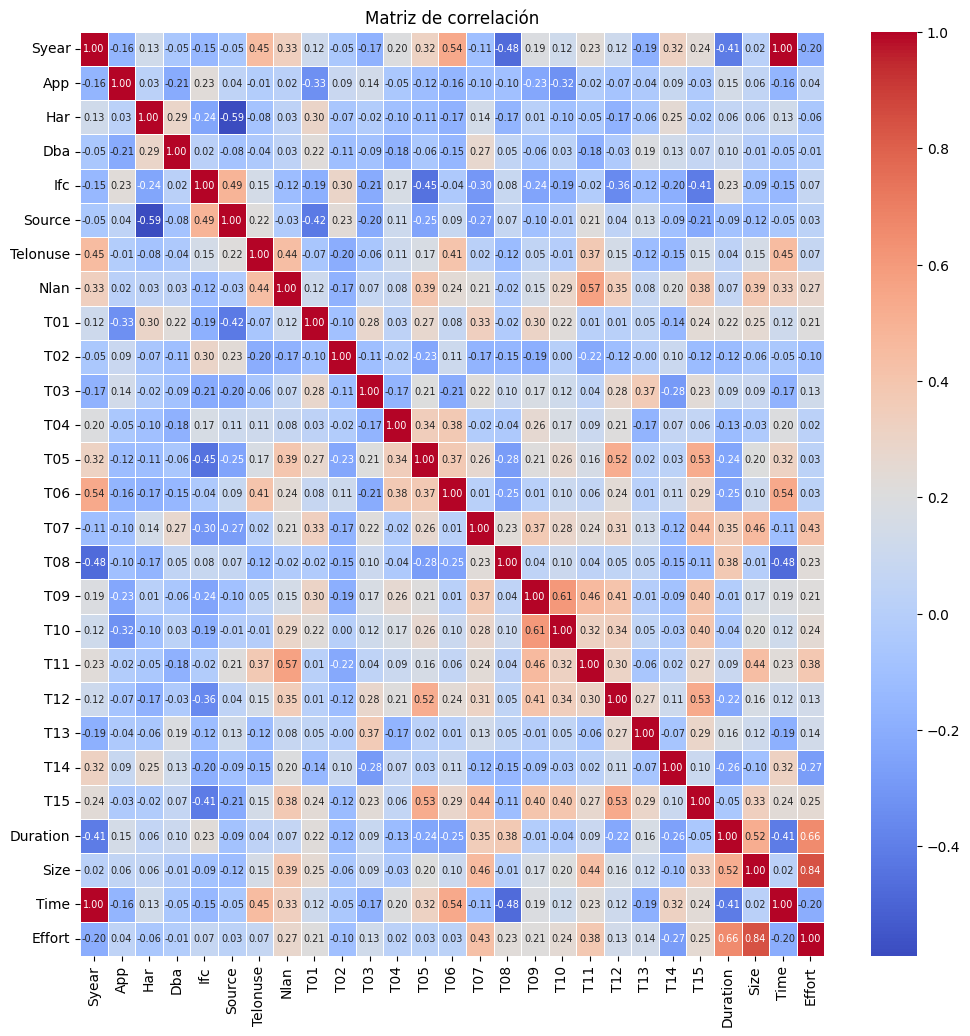

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7}, linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Pares de atributos con correlación superior a 0.95
high_correlation_pairs = []
atributos = []

# Recorre la matriz de correlación y verifica los valores
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            attribute_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(attribute_pair)

# Imprime los pares de atributos con correlación superior a 0.8 y crear una lista de atributos sin repetir
for pair in high_correlation_pairs:
    print("Correlación alta entre: ", pair[0], "y", pair[1])
    atributos.extend(pair)

# Eliminar duplicados y mantener el orden
atributos = list(dict.fromkeys(atributos))

# Imprimir la lista de atributos
print("Lista de atributos con correlación alta: ", atributos)

Correlación alta entre:  Syear y Time
Correlación alta entre:  Size y Effort
Lista de atributos con correlación alta:  ['Syear', 'Time', 'Size', 'Effort']


**VALIDACIÓN CRUZADA PARA COMPROBAR EL EFECTO DE LOS PARÁMETROS:**

In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('reg_svr',reg_svr),('rfr',rfr),('reg_gbr',reg_gbr),('knnr',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
for i in atributos:
  print("\n##########################################################################################################")
  print("\nPARA EL ATRIBUTO: ", i)
  # Preparando los datos
  x=df[feature_names].values
  y=df['Effort'].values

  alg_escalado = StandardScaler(with_mean=True, with_std=True)
  x_escalado = alg_escalado.fit_transform(x)
  y=y.reshape(-1,1)
  y_escalado = alg_escalado.fit_transform(y)

  df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
  df_y_transf = pd.DataFrame(y_escalado, columns=['Effort'])
  df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

  X=df_data_transf[feature_names]
  Y=df_data_transf['Effort']

  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
  x_train_sin=x_train.drop(i, axis=1)

  for j in modelos:
    # Realizar validación cruzada con y sin el atributo con alta correlación:
    # Con el atributo
    cv_scores_con = cross_val_score(j, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Sin el atributo
    cv_scores_sin = cross_val_score(j, x_train_sin, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcular el estadístico t y el p-valor
    t_statistic, p_value = ttest_rel(cv_scores_con, cv_scores_sin)

    # Mostrar los resultados
    print("-------------------------------------------------------------------------------------------------------------")
    print("El modelo: ", j)
    print("MSE de validación cruzada (con atributo):", cv_scores_con)
    print("MSE de validación cruzada (sin atributo):", cv_scores_sin)
    print("El MSE medio con atributo es: ", np.mean(cv_scores_con), "\nEl MSE medio sin atributo es: ", np.mean(cv_scores_sin))
    if np.mean(cv_scores_con) > np.mean(cv_scores_sin):
      print("El atributo mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))
    else:
      print("El atributo no mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))

    print("Estadístico t:", t_statistic)
    print("p-valor:", p_value)


##########################################################################################################

PARA EL ATRIBUTO:  Syear
-------------------------------------------------------------------------------------------------------------
El modelo:  SVR()
MSE de validación cruzada (con atributo): [-0.14266925 -0.60624681 -1.1271024  -0.03667859 -0.03493809]
MSE de validación cruzada (sin atributo): [-0.14380195 -0.58898355 -1.10805238 -0.03407068 -0.03166168]
El MSE medio con atributo es:  -0.38952702853933324 
El MSE medio sin atributo es:  -0.3813140467154855
El atributo no mejora el desempeño del modelo, con una diferencia de:  -0.00821298182384772
Estadístico t: -1.9847234555544013
p-valor: 0.11816138810720873
-------------------------------------------------------------------------------------------------------------
El modelo:  RandomForestRegressor()
MSE de validación cruzada (con atributo): [-0.1377105  -0.21659171 -0.22094816 -0.12653949 -0.01022845]
MSE de validación cr

In [ ]:
#estos atributos tienen alta correlación, por lo tanto los elimino
feature_names.remove('Syear')
print(feature_names)

['App', 'Har', 'Dba', 'Ifc', 'Source', 'Telonuse', 'Nlan', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'Duration', 'Size', 'Time']


In [ ]:
df_final=df
df_final=df_final.drop("Syear", axis=1)
df_final.describe()

,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2.354839,2.612903,1.032258,1.935484,1.870968,0.241935,2.548387,3.048387,3.048387,3.032258,3.193548,3.048387,2.903226,3.241935,3.806452,4.064516,3.612903,3.419355,3.822581,3.064516,3.258065,3.338710,17.209677,673.306452,5.580645,8223.209677
std,0.993368,0.997617,0.442339,0.247676,0.337972,0.431751,1.019119,0.998809,0.711208,0.886469,0.697506,0.711208,0.694467,0.899644,0.955377,0.743738,0.893599,0.984276,0.690075,0.955930,1.007114,0.745336,10.651156,784.084505,2.131331,10499.903168
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,48.000000,1.000000,583.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,10.000000,232.500000,4.000000,2388.750000
50%,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,13.500000,385.000000,6.000000,5189.500000
75%,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.500000,640.750000,7.000000,9308.000000
max,5.000000,5.000000,4.000000,2.000000,2.000000,1.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,54.000000,3643.000000,9.000000,63694.000000


In [ ]:
# Tomar los valores de la variable dependiente (y) y las independientes (x)
x=df[feature_names].values
y=df['Effort'].values

# Se realiza una normalización con el objetivo de obtener una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)
x_escalado = alg_escalado.fit_transform(x)
y=y.reshape(-1,1) # es necesario que sea un array 1d
y_escalado = alg_escalado.fit_transform(y)
y_escalado=y_escalado.ravel() #p ara aplanar y_escalado

df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
df_y_transf = pd.DataFrame(y_escalado, columns=['Effort'])
df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

X=df_data_transf[feature_names]
Y=df_data_transf['Effort']

In [ ]:
#dividir en conjunto de entrenamiento y test 70%-30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

# Algoritmos:

## **SVR:**

**GRIDSEARCHCV:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=svm.SVR()
params={'kernel':['linear','poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4],'gamma':['auto','scale',0.1],'C':list(np.arange(0.5,21.5,1.0))}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=4, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 12 folds for each of 1008 candidates, totalling 12096 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=None),
             estimator=SVR(),
             param_grid={'C': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5,
                               10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
                               18.5, 19.5, 20.5],
                         'degree': [1, 2, 3, 4],
                         'gamma': ['auto', 'scale', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
SVR(C=0.5, degree=1, gamma='auto', kernel='poly')
0.32402625207111097


In [ ]:
#definir algoritmo SVR con los mejores parámetros
svr = svm.SVR(kernel='poly',gamma='auto', degree=1, C=0.5)

In [ ]:
#entrenamiento
modelo_svr=svr.fit(x_train,y_train)

In [ ]:
#predicciones
y_pred = modelo_svr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
50 -0.361714  -0.206109
56  0.525862  -0.032218
0  -0.033818   0.116520
57 -0.107367   0.141727
5  -0.518221  -0.467654
48 -0.621055  -0.682061
16  1.698223   0.458136
12 -0.733586  -0.144619
25  5.326108   0.969240
59 -0.345967  -0.044847
30 -0.505643   0.034030
9  -0.376693  -0.640437
47  0.268826   0.314629
13 -0.543281  -0.413704
33 -0.478470  -0.332046
34  0.170601   0.121150
3   1.252898   0.143120
17  2.790506   0.918330
54 -0.459267  -0.314144
Desviación Estándar Predicciones: 0.44
Media Predicciones: -0.00


In [ ]:
#calcular residuos
residuos = y_test - y_pred
print(residuos)

50   -0.155605
56    0.558079
0    -0.150338
57   -0.249093
5    -0.050567
48    0.061006
16    1.240087
12   -0.588967
25    4.356868
59   -0.301121
30   -0.539673
9     0.263744
47   -0.045803
13   -0.129577
33   -0.146424
34    0.049451
3     1.109779
17    1.872176
54   -0.145123
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.3689
Median Bias Error: -0.0506
Maximum Absolute Error: 4.3569
Interquartile Range of Error: 0.7137
Standard Deviation of Error: 1.1230
Variance of Error: 1.2611
---------------------------------------------------
Mean absolute error: 0.63
Median absolute error: 0.25
Mean absolute percentage error: 85.89 %
Mean squared error: 1.40
Root mean squared error: 1.18
Root mean squared percentage error: 13.04 %
Coefficient of determination: 0.35
---------------------------------------------------
Mean Magnitude of Error: -0.3719
Median Magnitude of Error: -0.2385
Percentage of Relative Error within 25%: 68.42 %


In [ ]:
modelo_svr.score(x_test, y_test)

0.35307490941722897

In [ ]:
modelo_svr.score(x_train, y_train)

0.7002963646924887

**VALIDACIÓN CRUZADA**

In [ ]:
# El número de folds
n_folds = 4

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_svr=svm.SVR(C=0.5, degree=1, gamma='auto', kernel='poly')
    cv_svr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_svr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.36
CV Mean squared error: 0.54
CV Root mean squared error: 0.62
CV Coefficient of determination: 0.46
CV Mean Magnitude of Error: -0.3404
CV Percentage of Relative Error within 25%: 71.15 %


In [ ]:
cv_results = cross_validate(svr, X, Y, cv=4, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.2061837  -0.6875635  -0.22035745 -0.32352626]  // Con una media de:  -0.35940772910480806
Error Cuadrático Medio:  [-0.10651501 -1.61965252 -0.076095   -0.35506212]  // Con una media de:  -0.5393311641373669
Raiz Error Cuadrático Medio:  [-0.32636637 -1.2726557  -0.27585323 -0.59587089]  // Con una media de:  -0.6176865473418013
Coeficiente de Determinación:  [0.56722162 0.33678698 0.42641871 0.51440326]  // Con una media de:  0.461207642336392


In [ ]:
score_result={"Modelo":["SVR"],"MAE":[mean_mae], "MSE":[mean_mse], "RMSE":[mean_rmse], "R2":[mean_r2], "MMRE":[abs(mean_mmre)], "PRED(0.25)":[mean_pred_25/100]}
score_result=pd.DataFrame(score_result)

In [ ]:
score_result

,Modelo,MAE,MSE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.359408,0.539331,0.617687,0.461208,0.340407,0.711458


## **RandomForest:**

In [ ]:
modelo=RandomForestRegressor(random_state=42)
params={'n_estimators':[100,200,400],'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3],'bootstrap':[True,False],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','rmse':'neg_root_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=3, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 9 folds for each of 432 candidates, totalling 3888 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 400]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)
0.5963067217551729


In [ ]:
rf = RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [ ]:
modelo_rf=rf.fit(x_train,y_train)

In [ ]:
y_pred = modelo_rf.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
50 -0.361714  -0.265498
56  0.525862   0.267574
0  -0.033818   0.097514
57 -0.107367  -0.146961
5  -0.518221  -0.362481
48 -0.621055  -0.581985
16  1.698223   0.612932
12 -0.733586  -0.620925
25  5.326108   1.478535
59 -0.345967  -0.496216
30 -0.505643  -0.028226
9  -0.376693  -0.607669
47  0.268826   0.110163
13 -0.543281  -0.275254
33 -0.478470  -0.211133
34  0.170601  -0.080316
3   1.252898  -0.107043
17  2.790506   1.069825
54 -0.459267  -0.627846
Desviación Estándar Predicciones: 0.56
Media Predicciones: -0.04


In [ ]:
residuos = y_test - y_pred
print(residuos)

50   -0.096216
56    0.258288
0    -0.131332
57    0.039595
5    -0.155740
48   -0.039069
16    1.085291
12   -0.112660
25    3.847573
59    0.150249
30   -0.477417
9     0.230977
47    0.158663
13   -0.268027
33   -0.267337
34    0.250917
3     1.359942
17    1.720681
54    0.168579
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.4065
Median Bias Error: 0.1502
Maximum Absolute Error: 3.8476
Interquartile Range of Error: 0.3896
Standard Deviation of Error: 0.9827
Variance of Error: 0.9658
---------------------------------------------------
Mean absolute error: 0.57
Median absolute error: 0.23
Mean absolute percentage error: 74.01 %
Mean squared error: 1.13
Root mean squared error: 1.06
Root mean squared percentage error: 10.95 %
Coefficient of determination: 0.48
---------------------------------------------------
Mean Magnitude of Error: -0.1490
Median Magnitude of Error: -0.2660
Percentage of Relative Error within 25%: 63.16 %


In [ ]:
modelo_rf.score(x_test, y_test)

0.4763093071060269

In [ ]:
modelo_rf.score(x_train, y_train)

0.8514887439044762

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 4

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_rf=RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)
    cv_rf.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_rf.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.33
CV Mean squared error: 0.48
CV Root mean squared error: 0.58
CV Coefficient of determination: 0.35
CV Mean Magnitude of Error: -0.0857
CV Percentage of Relative Error within 25%: 71.15 %


In [ ]:
cv_results = cross_validate(rf, X, Y, cv=4, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.24109012 -0.62058914 -0.22881511 -0.21060128]  // Con una media de:  -0.32527391292894214
Error Cuadrático Medio:  [-0.16624849 -1.4957429  -0.15318869 -0.10067031]  // Con una media de:  -0.47896259754056536
Raiz Error Cuadrático Medio:  [-0.40773581 -1.22300568 -0.39139327 -0.31728585]  // Con una media de:  -0.5848551515160639
Coeficiente de Determinación:  [ 0.32452008  0.38752531 -0.15469037  0.86231938]  // Con una media de:  0.3549185984331454


In [ ]:
score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-36-06667e9c6bdf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **GradientBoostingRegresor:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=GradientBoostingRegressor(random_state=42)
params={'loss':['squared_error', 'absolute_error'],'learning_rate':[0.1,0.3,0.5],'n_estimators':[100,300,500],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,3,4],'min_samples_leaf':[1,3,5],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=3, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 9 folds for each of 972 candidates, totalling 8748 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
GradientBoostingRegressor(loss='absolute_error', min_samples_split=4,
                          n_estimators=300, random_state=42)
0.6274388435738436


In [ ]:
gbr= GradientBoostingRegressor(loss='absolute_error', min_samples_split=4,n_estimators=300, random_state=42)

In [ ]:
modelo_gbr=gbr.fit(x_train,y_train)

In [ ]:
y_pred = modelo_gbr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
50 -0.361714  -0.183762
56  0.525862   0.305628
0  -0.033818   0.079156
57 -0.107367  -0.109595
5  -0.518221  -0.361154
48 -0.621055  -0.559941
16  1.698223   0.585487
12 -0.733586  -0.656359
25  5.326108   1.158974
59 -0.345967  -0.533832
30 -0.505643  -0.001432
9  -0.376693  -0.639280
47  0.268826   0.051981
13 -0.543281  -0.379393
33 -0.478470  -0.175596
34  0.170601  -0.063383
3   1.252898  -0.028147
17  2.790506   0.912141
54 -0.459267  -0.579738
Desviación Estándar Predicciones: 0.50
Media Predicciones: -0.06


In [ ]:
residuos = y_test - y_pred
print(residuos)

50   -0.177953
56    0.220234
0    -0.112974
57    0.002229
5    -0.157066
48   -0.061114
16    1.112736
12   -0.077227
25    4.167134
59    0.187864
30   -0.504210
9     0.262587
47    0.216845
13   -0.163888
33   -0.302875
34    0.233984
3     1.281046
17    1.878365
54    0.120471
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.4277
Median Bias Error: 0.1205
Maximum Absolute Error: 4.1671
Interquartile Range of Error: 0.4197
Standard Deviation of Error: 1.0518
Variance of Error: 1.1062
---------------------------------------------------
Mean absolute error: 0.59
Median absolute error: 0.22
Mean absolute percentage error: 71.18 %
Mean squared error: 1.29
Root mean squared error: 1.14
Root mean squared percentage error: 10.03 %
Coefficient of determination: 0.40
---------------------------------------------------
Mean Magnitude of Error: -0.1086
Median Magnitude of Error: -0.1053
Percentage of Relative Error within 25%: 63.16 %


In [ ]:
modelo_gbr.score(x_test, y_test)

0.40309226205469106

In [ ]:
modelo_gbr.score(x_train, y_train)

0.825932413783463

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 4

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_gbr=GradientBoostingRegressor(loss='absolute_error', min_samples_split=4,n_estimators=300, random_state=42)
    cv_gbr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_gbr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.33
CV Mean squared error: 0.51
CV Root mean squared error: 0.59
CV Coefficient of determination: 0.39
CV Mean Magnitude of Error: 0.0606
CV Percentage of Relative Error within 25%: 71.15 %


In [ ]:
cv_results = cross_validate(gbr, X, Y, cv=4, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.21508893 -0.67386849 -0.22153349 -0.21030617]  // Con una media de:  -0.3301992684148825
Error Cuadrático Medio:  [-0.13832014 -1.64586134 -0.14516022 -0.09262141]  // Con una media de:  -0.5054907764931321
Raiz Error Cuadrático Medio:  [-0.37191415 -1.28291128 -0.38099897 -0.30433765]  // Con una media de:  -0.5850405138854138
Coeficiente de Determinación:  [ 0.43799503  0.32605502 -0.09417416  0.87332737]  // Con una media de:  0.38580081724665893


In [ ]:
score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-46-0f69b13d04a5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **Voting:**

In [ ]:
reg_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])

In [ ]:
modelo_voting=reg_vot.fit(x_train,y_train)

In [ ]:
y_pred = modelo_voting.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
50 -0.361714  -0.218456
56  0.525862   0.180328
0  -0.033818   0.097730
57 -0.107367  -0.038277
5  -0.518221  -0.397096
48 -0.621055  -0.607996
16  1.698223   0.552185
12 -0.733586  -0.473968
25  5.326108   1.202250
59 -0.345967  -0.358298
30 -0.505643   0.001457
9  -0.376693  -0.629129
47  0.268826   0.158924
13 -0.543281  -0.356117
33 -0.478470  -0.239592
34  0.170601  -0.007516
3   1.252898   0.002643
17  2.790506   0.966765
54 -0.459267  -0.507243
Desviación Estándar Predicciones: 0.49
Media Predicciones: -0.04


In [ ]:
residuos = y_test - y_pred
print(residuos)

50   -0.143258
56    0.345534
0    -0.131548
57   -0.069090
5    -0.121125
48   -0.013059
16    1.146038
12   -0.259618
25    4.123858
59    0.012331
30   -0.507100
9     0.252436
47    0.109902
13   -0.187164
33   -0.238878
34    0.178117
3     1.250255
17    1.823741
54    0.047976
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.4010
Median Bias Error: 0.0123
Maximum Absolute Error: 4.1239
Interquartile Range of Error: 0.4888
Standard Deviation of Error: 1.0477
Variance of Error: 1.0977
---------------------------------------------------
Mean absolute error: 0.58
Median absolute error: 0.19
Mean absolute percentage error: 70.56 %
Mean squared error: 1.26
Root mean squared error: 1.12
Root mean squared percentage error: 10.73 %
Coefficient of determination: 0.42
---------------------------------------------------
Mean Magnitude of Error: -0.1571
Median Magnitude of Error: -0.1045
Percentage of Relative Error within 25%: 63.16 %


In [ ]:
modelo_voting.score(x_test, y_test)

0.4172498157681084

In [ ]:
modelo_voting.score(x_train, y_train)

0.8106418040887737

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 4

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])
    cv_vot.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_vot.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = np.sum(mre <= 0.25)
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.31
CV Mean squared error: 0.48
CV Root mean squared error: 0.57
CV Coefficient of determination: 0.50
CV Mean Magnitude of Error: -0.0808
CV Percentage of Relative Error within 25%: 71.04 %


In [ ]:
cv_results = cross_validate(reg_vot, X, Y, cv=4, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.20155016 -0.63367222 -0.17691405 -0.22741814]  // Con una media de:  -0.30988864385815257
Error Cuadrático Medio:  [-0.12736202 -1.57137598 -0.08429962 -0.14513715]  // Con una media de:  -0.48204369256647595
Raiz Error Cuadrático Medio:  [-0.35687816 -1.25354536 -0.29034397 -0.3809687 ]  // Con una media de:  -0.5704340491784019
Coeficiente de Determinación:  [0.48251867 0.35655519 0.36457474 0.8015048 ]  // Con una media de:  0.501288348733032


In [ ]:
score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-56-c16958f5272a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


# **Explicabilidad:**

In [ ]:
# Crear las columnas del MultiIndex
columns_multi = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

## **SVR:**

**FEATURE IMPORTANCE:**

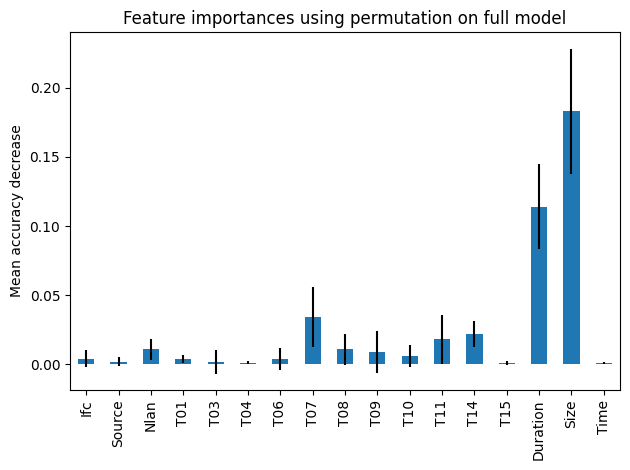

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

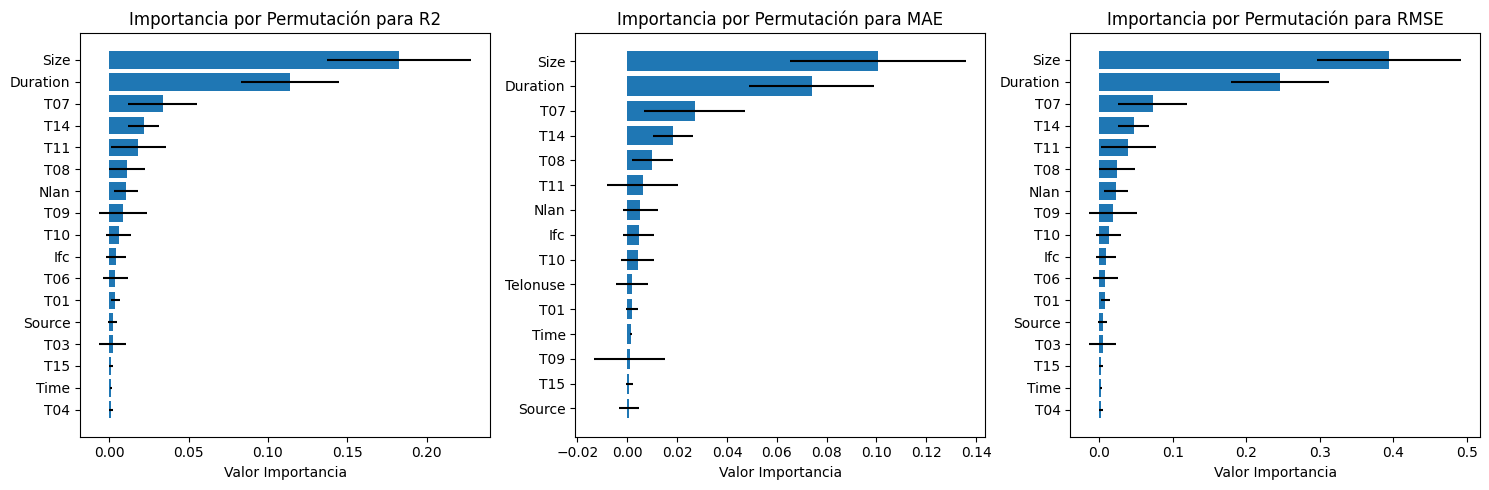

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_svr = {}

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_svr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_svr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
15,Size,0.182821,0.045401
14,Duration,0.114150,0.030914
7,T07,0.033694,0.021624
12,T14,0.021696,0.009633
11,T11,0.018401,0.017452
8,T08,0.011279,0.011203
2,Nlan,0.010680,0.007534
9,T09,0.008814,0.015048
10,T10,0.005887,0.007991
0,Ifc,0.004303,0.006273


In [ ]:
results_global_svr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
13,Size,0.100773,0.035304
12,Duration,0.073988,0.025191
5,T07,0.027092,0.020238
10,T14,0.018292,0.008014
6,T08,0.010051,0.008228
9,T11,0.006172,0.014314
3,Nlan,0.005155,0.007021
0,Ifc,0.004556,0.006266
8,T10,0.004133,0.006511
2,Telonuse,0.001930,0.006295


In [ ]:
results_global_svr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
15,Size,0.394830,0.098051
14,Duration,0.246524,0.066764
7,T07,0.072768,0.046699
12,T14,0.046856,0.020803
11,T11,0.039740,0.037690
8,T08,0.024358,0.024195
2,Nlan,0.023066,0.016270
9,T09,0.019035,0.032498
10,T10,0.012713,0.017259
0,Ifc,0.009294,0.013548


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_svr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 43 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 43 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7ed55b832e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.728, mean = -0.191, max = 0.964
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.429, mean = 0.0296, max = 2.04
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  8
El valor máximo obtenido es:  0.9692400945240978
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  5
El valor mínimo obtenido es:  -0.6820606218997507
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  1
El valor de la mediana es:  -0.03221754936598675


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

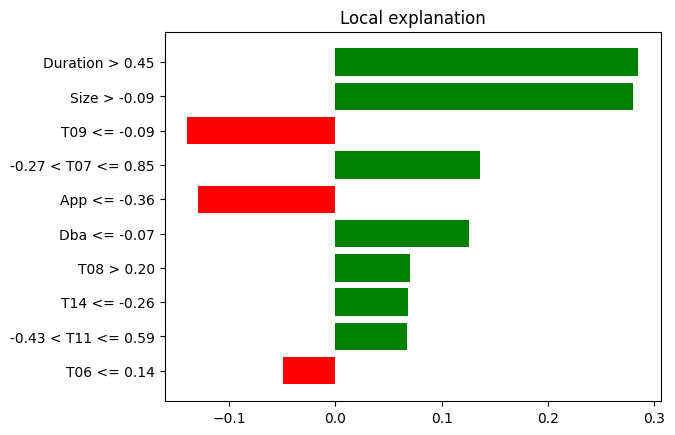

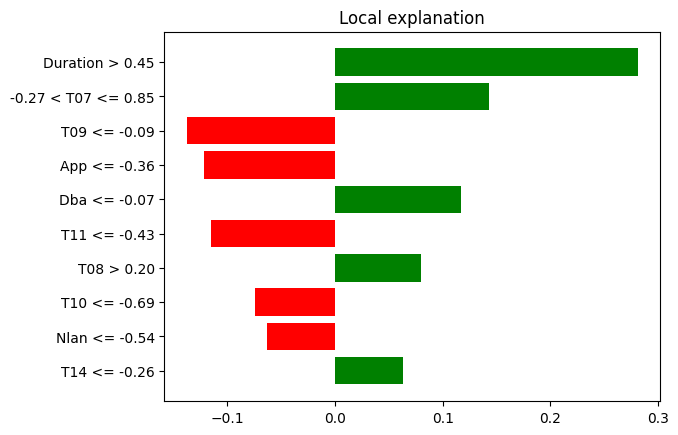

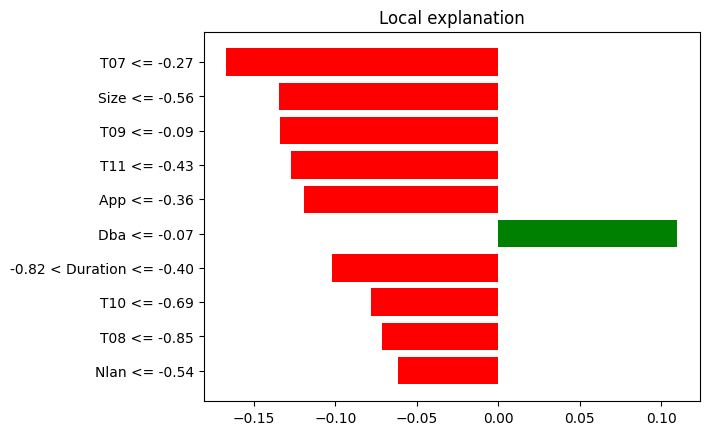

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 26])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(25)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[3, "Variable"] = "T07"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T08        4  Positivo
4       T11        5  Positivo
   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T08        4  Positivo
4       T11        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1      Size        2  Positivo
2       T09        3  Negativo
3       T07        4  Positivo
4       App        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Size', 'Duration', 'T07', 'T08', 'T11']
['Size', 'Duration', 'T07', 'T08', 'T11']
['Duration', 'Size', 'T09', 'T07', 'App']
['T09', 'Duration', 'T11', 'App', 'T07', 'T08', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T09         -         -       -         -       3  Negativo
1  Duration         2  Positivo       2  Positivo       1  Positivo
2       T11         5  Positivo       5  Positivo       -         -
3       App         -         -       -         -       5  Negativo
4       T07         3  Positivo       3  Positivo       4  Positivo
5       T08         4  Positivo       4  Positivo       -         -
6      Size         1  Positivo       1  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "T08", "T11", "T09", "App"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Positivo       1  Positivo       2  Positivo
Duration         2  Positivo       2  Positivo       1  Positivo
T07              3  Positivo       3  Positivo       4  Positivo
T08              4  Positivo       4  Positivo       -         -
T11              5  Positivo       5  Positivo       -         -
T09              -         -       -         -       3  Negativo
App              -         -       -         -       5  Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 26])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(25)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"]="T07"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Positivo
2      Nlan        3  Negativo
3       T08        4  Positivo
4       T14        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Positivo
2      Nlan        3  Negativo
3       T08        4  Positivo
4       T14        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Positivo
2       T09        3  Negativo
3       App        4  Negativo
4       Dba        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Duration', 'T07', 'Nlan', 'T08', 'T14']
['Duration', 'T07', 'Nlan', 'T08', 'T14']
['Duration', 'T07', 'T09', 'App', 'Dba']
['T09', 'Duration', 'App', 'T14', 'T07', 'T08', 'Nlan', 'Dba']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T09         -         -       -         -       3  Negativo
1  Duration         1  Positivo       1  Positivo       1  Positivo
2       App         -         -       -         -       4  Negativo
3       T14         5  Positivo       5  Positivo       -         -
4       T07         2  Positivo       2  Positivo       2  Positivo
5       T08         4  Positivo       4  Positivo       -         -
6      Nlan         3  Negativo       3  Negativo       -         -
7       Dba         -         -       -         -       5  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Duration", "T07", "Nlan", "T08", "T14", "T09", "App"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Duration         1  Positivo       1  Positivo       1  Positivo
T07              2  Positivo       2  Positivo       2  Positivo
Nlan             3  Negativo       3  Negativo       -         -
T08              4  Positivo       4  Positivo       -         -
T14              5  Positivo       5  Positivo       -         -
T09              -         -       -         -       3  Negativo
App              -         -       -         -       4  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 26])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(25)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

   Variable  Ranking     Signo
0       T07        1  Negativo
1       T09        2  Negativo
2      Size        3  Negativo
3       T08        4  Negativo
4  Duration        5  Negativo
   Variable  Ranking     Signo
0       T07        1  Negativo
1       T09        2  Negativo
2      Size        3  Negativo
3       T08        4  Negativo
4  Duration        5  Negativo
  Variable  Ranking     Signo
0      T07        1  Negativo
1     Size        2  Negativo
2      T09        3  Negativo
3      T11        4  Negativo
4      App        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['T07', 'T09', 'Size', 'T08', 'Duration']
['T07', 'T09', 'Size', 'T08', 'Duration']
['T07', 'Size', 'T09', 'T11', 'App']
['T09', 'Duration', 'T11', 'App', 'T07', 'T08', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T09         2  Negativo       2  Negativo       3  Negativo
1  Duration         5  Negativo       5  Negativo       -         -
2       T11         -         -       -         -       4  Negativo
3       App         -         -       -         -       5  Negativo
4       T07         1  Negativo       1  Negativo       1  Negativo
5       T08         4  Negativo       4  Negativo       -         -
6      Size         3  Negativo       3  Negativo       2  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["T07", "T09", "Size", "T08", "Duration", "T11", "App"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
T07              1  Negativo       1  Negativo       1  Negativo
T09              2  Negativo       2  Negativo       3  Negativo
Size             3  Negativo       3  Negativo       2  Negativo
T08              4  Negativo       4  Negativo       -         -
Duration         5  Negativo       5  Negativo       -         -
T11              -         -       -         -       4  Negativo
App              -         -       -         -       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Size', 1), ('Duration', 2), ('T07', 3), ('T08', 4), ('T11', 5), ('Duration', 1), ('T07', 2), ('Nlan', 3), ('T08', 4), ('T14', 5), ('T07', 1), ('T09', 2), ('Size', 3), ('T08', 4), ('Duration', 5)], 'Shapley': [('Size', 1), ('Duration', 2), ('T07', 3), ('T08', 4), ('T11', 5), ('Duration', 1), ('T07', 2), ('Nlan', 3), ('T08', 4), ('T14', 5), ('T07', 1), ('T09', 2), ('Size', 3), ('T08', 4), ('Duration', 5)], 'Lime': [('Size', 2), ('Duration', 1), ('T07', 4), ('T09', 3), ('App', 5), ('Duration', 1), ('T07', 2), ('T09', 3), ('App', 4), ('T07', 1), ('T09', 3), ('Size', 2), ('T11', 4), ('App', 5)]}
{'Breakdown': {'Size': 2, 'Duration': 3, 'T07': 3, 'T08': 3, 'T11': 1, 'Nlan': 1, 'T14': 1, 'T09': 1}, 'Shapley': {'Size': 2, 'Duration': 3, 'T07': 3, 'T08': 3, 'T11': 1, 'Nlan': 1, 'T14': 1, 'T09': 1}, 'Lime': {'Size': 2, 'Duration': 2, 'T07': 3, 'T09': 3, 'App': 3, 'T11': 1}}
{'Breakdown': {'Size': 2.0, 'Duration': 2.6666666666666665, 'T07': 2.0, 'T08': 4.0, 'T11': 5.0, 'Nlan': 3.

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_svr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_svr

Breakdown              Shapley                 Lime       
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Size               2.0      2           2.0      2           2.0      2
Nlan               3.0      1           3.0      1             -      -
T08                4.0      3           4.0      3             -      -
T07                2.0      3           2.0      3      2.333333      3
T14                5.0      1           5.0      1             -      -
App                  -      -             -      -      4.666667      3
T11                5.0      1           5.0      1           4.0      1
Duration      2.666667      3      2.666667      3           1.0      2
T09                2.0      1           2.0      1           3.0      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_svr[("General", "Conteo Total")] = df_resumen_svr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_svr

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Size               2.0      2           2.0      2           2.0      2   
Nlan               3.0      1           3.0      1             -      -   
T08                4.0      3           4.0      3             -      -   
T07                2.0      3           2.0      3      2.333333      3   
T14                5.0      1           5.0      1             -      -   
App                  -      -             -      -      4.666667      3   
T11                5.0      1           5.0      1           4.0      1   
Duration      2.666667      3      2.666667      3           1.0      2   
T09                2.0      1           2.0      1           3.0      3   

           General               
           Ranking Conteo Total  
Size      2.000000            6  
Nlan      3.000000            2  
T08       4.000000            6  
T07       2.111111            9  
T14       5.000000            2  
App       4.666667            3  
T11       4.666667            3  
Duration  2.111111            8  
T09       2.333333            5

In [ ]:
# Obtener el número de características
num_caract = df_resumen_svr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_svr[("General", "Peso Rango")] = 1 - ((df_resumen_svr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_svr[("General", "Peso Conteo")] = df_resumen_svr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_svr[("General", "Puntaje")] = df_resumen_svr[("General", "Peso Rango")] + df_resumen_svr[("General", "Peso Conteo")]
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_svr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_svr

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Size               2.0      2           2.0      2           2.0      2   
Nlan               3.0      1           3.0      1             -      -   
T08                4.0      3           4.0      3             -      -   
T07                2.0      3           2.0      3      2.333333      3   
T14                5.0      1           5.0      1             -      -   
App                  -      -             -      -      4.666667      3   
T11                5.0      1           5.0      1           4.0      1   
Duration      2.666667      3      2.666667      3           1.0      2   
T09                2.0      1           2.0      1           3.0      3   

         General               
         Ranking Conteo Total  
Size         2.0            6  
Nlan         6.0            2  
T08          5.0            6  
T07          1.0            9  
T14          9.0            2  
App          7.0            3  
T11          7.0            3  
Duration     2.0            8  
T09          4.0            5

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_svr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_svr = df_resumen_svr[new_columns]

In [ ]:
df_resumen_svr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_svr[(tech, "Ranking Medio")] = df_resumen_svr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_svr

General                  Breakdown              Shapley         \
         Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
T07          1.0            9          2.00      3          2.00      3   
Size         2.0            6          2.00      2          2.00      2   
Duration     2.0            8          2.67      3          2.67      3   
T09          4.0            5          2.00      1          2.00      1   
T08          5.0            6          4.00      3          4.00      3   
Nlan         6.0            2          3.00      1          3.00      1   
App          7.0            3             -      -             -      -   
T11          7.0            3          5.00      1          5.00      1   
T14          9.0            2          5.00      1          5.00      1   

                  Lime         
         Ranking Medio Conteo  
T07               2.33      3  
Size              2.00      2  
Duration          1.00      2  
T09               3.00      3  
T08                  -      -  
Nlan                 -      -  
App               4.67      3  
T11               4.00      1  
T14                  -      -

## **RandomForest:**

**FEATURE IMPORTANCE:**

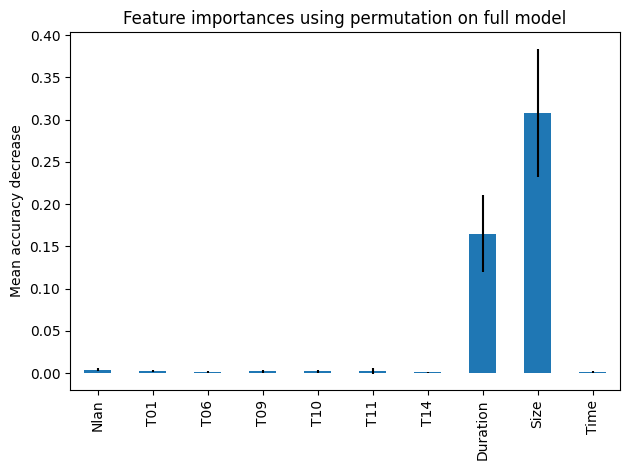

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

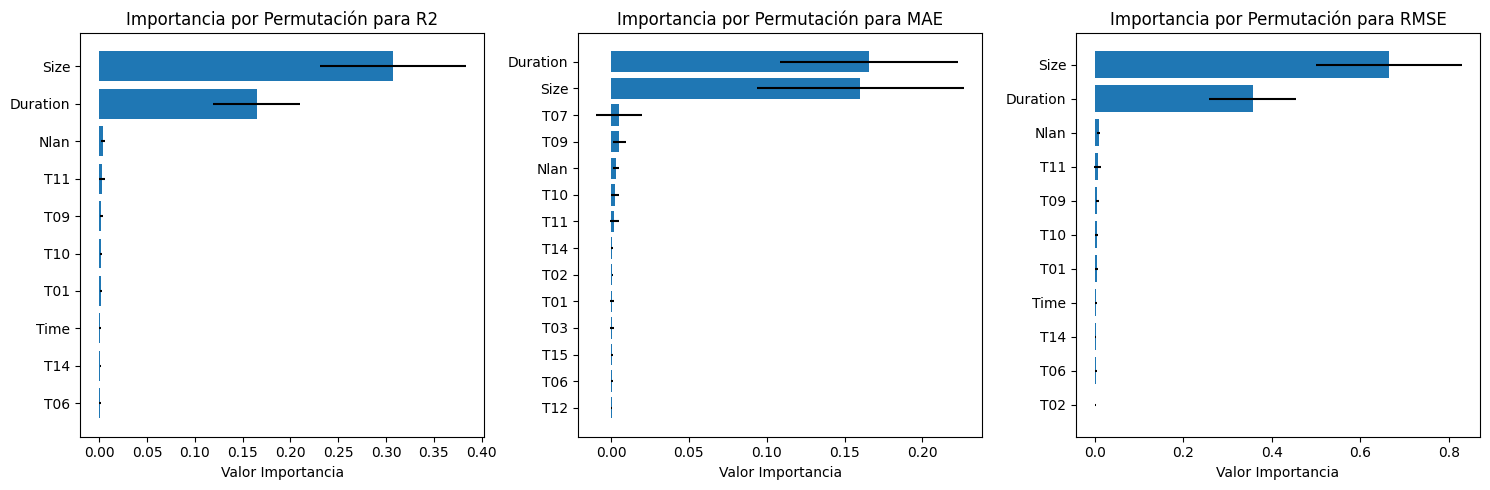

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_rf = {}

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_rf[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_rf['df_global_R2']

,Feature,Importance_Mean,Importance_Std
8,Size,0.307528,0.076128
7,Duration,0.164881,0.045365
0,Nlan,0.003712,0.001936
5,T11,0.002825,0.003489
3,T09,0.002365,0.001795
4,T10,0.001829,0.001340
1,T01,0.001686,0.001145
9,Time,0.000927,0.001115
6,T14,0.000905,0.000572
2,T06,0.000847,0.001118


In [ ]:
results_global_rf['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
12,Duration,0.165603,0.057078
13,Size,0.160157,0.066406
5,T07,0.005408,0.014715
6,T09,0.005212,0.004175
0,Nlan,0.003081,0.001942
7,T10,0.002498,0.002423
8,T11,0.002248,0.002798
10,T14,0.000836,0.000580
2,T02,0.000758,0.000368
1,T01,0.000609,0.001125


In [ ]:
results_global_rf['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
9,Size,0.664153,0.164410
8,Duration,0.356087,0.097974
0,Nlan,0.008018,0.004181
6,T11,0.006101,0.007536
4,T09,0.005107,0.003876
5,T10,0.003951,0.002894
1,T01,0.003641,0.002473
10,Time,0.002001,0.002407
7,T14,0.001955,0.001235
3,T06,0.001829,0.002415


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_rf, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 43 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 43 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7ed55b832e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.694, mean = -0.191, max = 1.5
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.296, mean = 0.0294, max = 1.5
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  8
El valor máximo obtenido es:  1.4785354280327594
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  18
El valor mínimo obtenido es:  -0.6278461069484209
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  3
El valor de la mediana es:  -0.1469611729439965


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

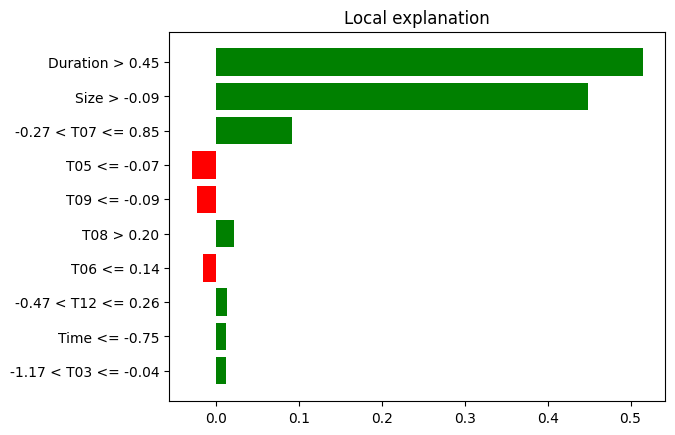

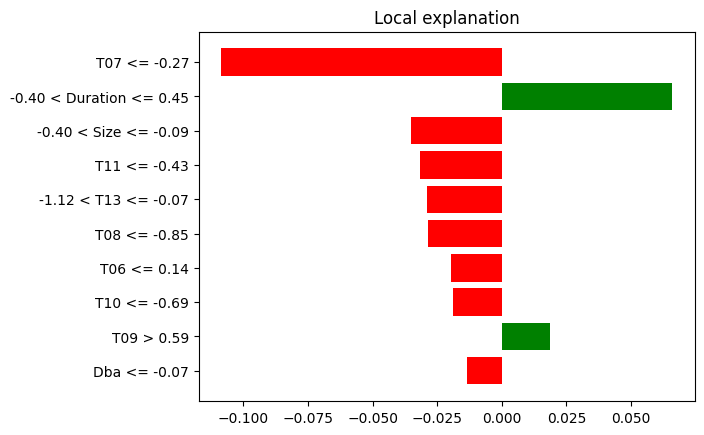

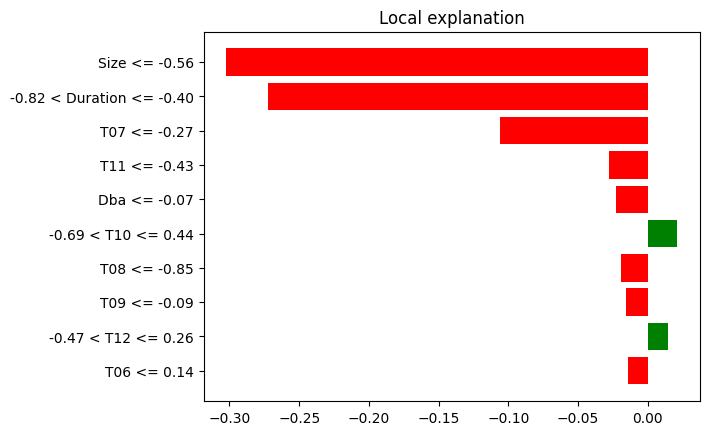

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 26])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(25)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[2, "Variable"] = "T07"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T10        4  Positivo
4       T11        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T01        4  Positivo
4      Nlan        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1      Size        2  Positivo
2       T07        3  Positivo
3       T05        4  Negativo
4       T09        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Size', 'Duration', 'T07', 'T10', 'T11']
['Size', 'Duration', 'T07', 'T01', 'Nlan']
['Duration', 'Size', 'T07', 'T05', 'T09']
['T09', 'Duration', 'T11', 'T05', 'T10', 'T07', 'Nlan', 'T01', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T09         -         -       -         -       5  Negativo
1  Duration         2  Positivo       2  Positivo       1  Positivo
2       T11         5  Negativo       -         -       -         -
3       T05         -         -       -         -       4  Negativo
4       T10         4  Positivo       -         -       -         -
5       T07         3  Positivo       3  Positivo       3  Positivo
6      Nlan         -         -       5  Positivo       -         -
7       T01         -         -       4  Positivo       -         -
8      Size         1  Positivo       1  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "T10", "T11", "Nlan", "T05", "T09"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Positivo       1  Positivo       2  Positivo
Duration         2  Positivo       2  Positivo       1  Positivo
T07              3  Positivo       3  Positivo       3  Positivo
T10              4  Positivo       -         -       -         -
T11              5  Negativo       -         -       -         -
Nlan             -         -       5  Positivo       -         -
T05              -         -       -         -       4  Negativo
T09              -         -       -         -       5  Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 26])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(25)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"]="Duration"
lime_df_median.at[2, "Variable"]="Size"
lime_df_median.at[4, "Variable"]="T13"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Negativo
2      Size        3  Negativo
3       T09        4  Positivo
4      Nlan        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Negativo
2       T09        3  Positivo
3       T15        4  Positivo
4      Nlan        5  Positivo
   Variable  Ranking     Signo
0       T07        1  Negativo
1  Duration        2  Positivo
2      Size        3  Negativo
3       T11        4  Negativo
4       T13        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Duration', 'T07', 'Size', 'T09', 'Nlan']
['Duration', 'T07', 'T09', 'T15', 'Nlan']
['T07', 'Duration', 'Size', 'T11', 'T13']
['T15', 'T13', 'T09', 'Duration', 'T11', 'T07', 'Nlan', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T15         -         -       4  Positivo       -         -
1       T13         -         -       -         -       5  Negativo
2       T09         4  Positivo       3  Positivo       -         -
3  Duration         1  Positivo       1  Positivo       2  Positivo
4       T11         -         -       -         -       4  Negativo
5       T07         2  Negativo       2  Negativo       1  Negativo
6      Nlan         5  Positivo       5  Positivo       -         -
7      Size         3  Negativo       -         -       3  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)

nuevo_orden = ["Duration","T07", "Size", "T09", "Nlan", "T15", "T11", "T13"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Duration         1  Positivo       1  Positivo       2  Positivo
T07              2  Negativo       2  Negativo       1  Negativo
Size             3  Negativo       -         -       3  Negativo
T09              4  Positivo       3  Positivo       -         -
Nlan             5  Positivo       5  Positivo       -         -
T15              -         -       4  Positivo       -         -
T11              -         -       -         -       4  Negativo
T13              -         -       -         -       5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 26])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(25)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[1, "Variable"] = "Duration"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3      Nlan        4  Negativo
4       T11        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       T03        4  Positivo
4       T11        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       T11        4  Negativo
4       Dba        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Size', 'Duration', 'T07', 'Nlan', 'T11']
['Size', 'Duration', 'T07', 'T03', 'T11']
['Size', 'Duration', 'T07', 'T11', 'Dba']
['Duration', 'T11', 'T07', 'Nlan', 'Dba', 'Size', 'T03']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0  Duration         2  Negativo       2  Negativo       2  Negativo
1       T11         5  Negativo       5  Negativo       4  Negativo
2       T07         3  Negativo       3  Negativo       3  Negativo
3      Nlan         4  Negativo       -         -       -         -
4       Dba         -         -       -         -       5  Negativo
5      Size         1  Negativo       1  Negativo       1  Negativo
6       T03         -         -       4  Positivo       -         -

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "Nlan", "T11", "T03", "Dba"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Negativo       1  Negativo       1  Negativo
Duration         2  Negativo       2  Negativo       2  Negativo
T07              3  Negativo       3  Negativo       3  Negativo
Nlan             4  Negativo       -         -       -         -
T11              5  Negativo       5  Negativo       4  Negativo
T03              -         -       4  Positivo       -         -
Dba              -         -       -         -       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Size', 1), ('Duration', 2), ('T07', 3), ('T10', 4), ('T11', 5), ('Duration', 1), ('T07', 2), ('Size', 3), ('T09', 4), ('Nlan', 5), ('Size', 1), ('Duration', 2), ('T07', 3), ('Nlan', 4), ('T11', 5)], 'Shapley': [('Size', 1), ('Duration', 2), ('T07', 3), ('Nlan', 5), ('Duration', 1), ('T07', 2), ('T09', 3), ('Nlan', 5), ('T15', 4), ('Size', 1), ('Duration', 2), ('T07', 3), ('T11', 5), ('T03', 4)], 'Lime': [('Size', 2), ('Duration', 1), ('T07', 3), ('T05', 4), ('T09', 5), ('Duration', 2), ('T07', 1), ('Size', 3), ('T11', 4), ('T13', 5), ('Size', 1), ('Duration', 2), ('T07', 3), ('T11', 4), ('Dba', 5)]}
{'Breakdown': {'Size': 3, 'Duration': 3, 'T07': 3, 'T10': 1, 'T11': 2, 'T09': 1, 'Nlan': 2}, 'Shapley': {'Size': 2, 'Duration': 3, 'T07': 3, 'Nlan': 2, 'T09': 1, 'T15': 1, 'T11': 1, 'T03': 1}, 'Lime': {'Size': 3, 'Duration': 3, 'T07': 3, 'T05': 1, 'T09': 1, 'T11': 2, 'T13': 1, 'Dba': 1}}
{'Breakdown': {'Size': 1.6666666666666667, 'Duration': 1.6666666666666667, 'T07': 2.666

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_rf = pd.DataFrame(data_dict, index=all_caract)

df_resumen_rf

Breakdown              Shapley                 Lime       
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
T03                  -      -           4.0      1             -      -
Size          1.666667      3           1.0      2           2.0      3
Dba                  -      -             -      -           5.0      1
Nlan               4.5      2           5.0      2             -      -
T07           2.666667      3      2.666667      3      2.333333      3
T10                4.0      1             -      -             -      -
T05                  -      -             -      -           4.0      1
T11                5.0      2           5.0      1           4.0      2
Duration      1.666667      3      1.666667      3      1.666667      3
T09                4.0      1           3.0      1           5.0      1
T13                  -      -             -      -           5.0      1
T15                  -      -           4.0      1             -      -

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_rf[("General", "Conteo Total")] = df_resumen_rf[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_rf

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
T03                  -      -           4.0      1             -      -   
Size          1.666667      3           1.0      2           2.0      3   
Dba                  -      -             -      -           5.0      1   
Nlan               4.5      2           5.0      2             -      -   
T07           2.666667      3      2.666667      3      2.333333      3   
T10                4.0      1             -      -             -      -   
T05                  -      -             -      -           4.0      1   
T11                5.0      2           5.0      1           4.0      2   
Duration      1.666667      3      1.666667      3      1.666667      3   
T09                4.0      1           3.0      1           5.0      1   
T13                  -      -             -      -           5.0      1   
T15                  -      -           4.0      1             -      -   

           General               
           Ranking Conteo Total  
T03       4.000000            1  
Size      1.555556            8  
Dba       5.000000            1  
Nlan      4.750000            4  
T07       2.555556            9  
T10       4.000000            1  
T05       4.000000            1  
T11       4.666667            5  
Duration  1.666667            9  
T09       4.000000            3  
T13       5.000000            1  
T15       4.000000            1

In [ ]:
# Obtener el número de características
num_caract = df_resumen_rf.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_rf[("General", "Peso Rango")] = 1 - ((df_resumen_rf[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_rf[("General", "Peso Conteo")] = df_resumen_rf[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_rf[("General", "Puntaje")] = df_resumen_rf[("General", "Peso Rango")] + df_resumen_rf[("General", "Peso Conteo")]
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_rf.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_rf

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
T03                  -      -           4.0      1             -      -   
Size          1.666667      3           1.0      2           2.0      3   
Dba                  -      -             -      -           5.0      1   
Nlan               4.5      2           5.0      2             -      -   
T07           2.666667      3      2.666667      3      2.333333      3   
T10                4.0      1             -      -             -      -   
T05                  -      -             -      -           4.0      1   
T11                5.0      2           5.0      1           4.0      2   
Duration      1.666667      3      1.666667      3      1.666667      3   
T09                4.0      1           3.0      1           5.0      1   
T13                  -      -             -      -           5.0      1   
T15                  -      -           4.0      1             -      -   

         General               
         Ranking Conteo Total  
T03          7.0            1  
Size         2.0            8  
Dba         11.0            1  
Nlan         6.0            4  
T07          3.0            9  
T10          7.0            1  
T05          7.0            1  
T11          5.0            5  
Duration     1.0            9  
T09          4.0            3  
T13         11.0            1  
T15          7.0            1

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_rf.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_rf = df_resumen_rf[new_columns]

In [ ]:
df_resumen_rf.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_rf[(tech, "Ranking Medio")] = df_resumen_rf[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_rf

General                  Breakdown              Shapley         \
         Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Duration     1.0            9          1.67      3          1.67      3   
Size         2.0            8          1.67      3          1.00      2   
T07          3.0            9          2.67      3          2.67      3   
T09          4.0            3          4.00      1          3.00      1   
T11          5.0            5          5.00      2          5.00      1   
Nlan         6.0            4          4.50      2          5.00      2   
T03          7.0            1             -      -          4.00      1   
T10          7.0            1          4.00      1             -      -   
T05          7.0            1             -      -             -      -   
T15          7.0            1             -      -          4.00      1   
Dba         11.0            1             -      -             -      -   
T13         11.0            1             -      -             -      -   

                  Lime         
         Ranking Medio Conteo  
Duration          1.67      3  
Size              2.00      3  
T07               2.33      3  
T09               5.00      1  
T11               4.00      2  
Nlan                 -      -  
T03                  -      -  
T10                  -      -  
T05               4.00      1  
T15                  -      -  
Dba               5.00      1  
T13               5.00      1

## **GradientBoostingRegresor:**

**FEATURE IMPORTANCE:**

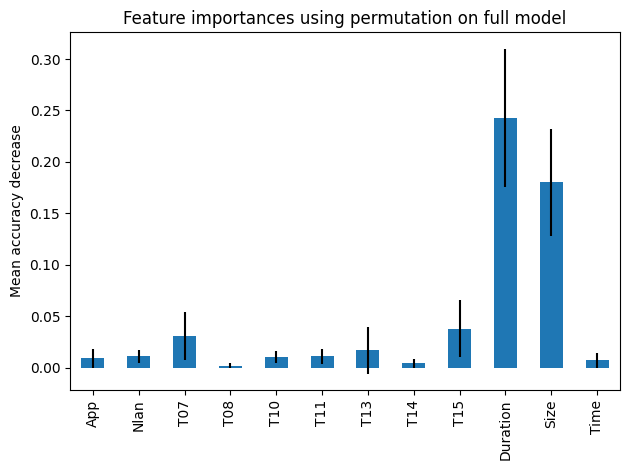

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

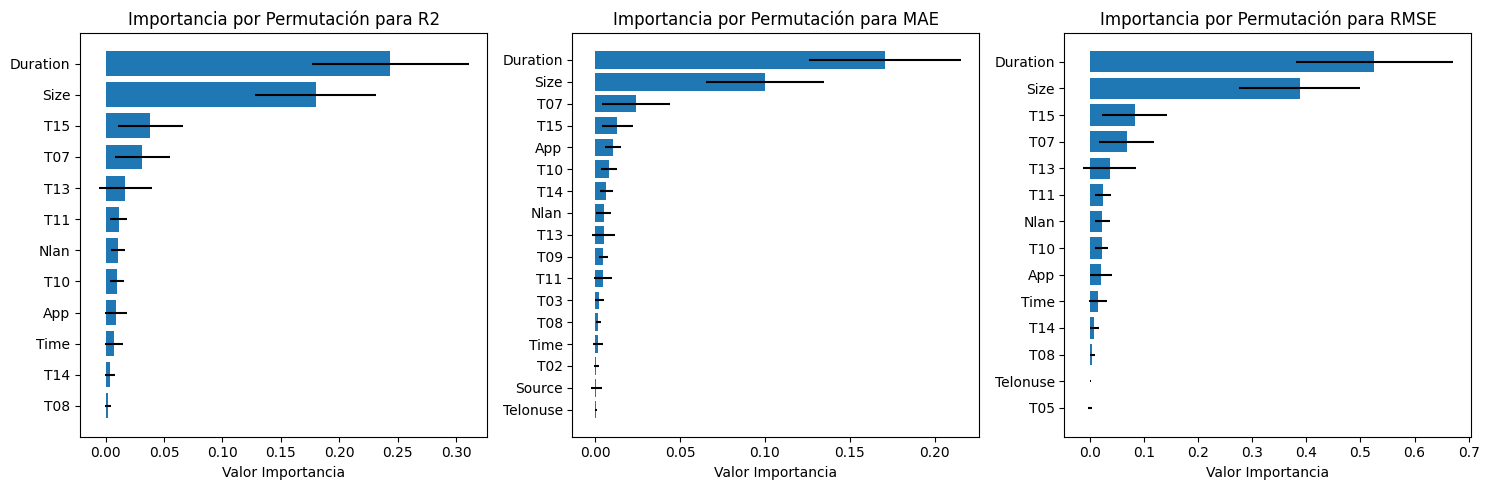

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_gbr = {}

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_gbr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_gbr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
9,Duration,0.243499,0.067167
10,Size,0.179706,0.051695
8,T15,0.038343,0.027901
2,T07,0.031427,0.023493
6,T13,0.016933,0.022779
5,T11,0.011226,0.007145
1,Nlan,0.010668,0.006244
4,T10,0.010067,0.005836
0,App,0.009325,0.009382
11,Time,0.007223,0.007501


In [ ]:
results_global_gbr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
14,Duration,0.170603,0.044847
15,Size,0.100188,0.034889
6,T07,0.024177,0.019930
13,T15,0.013063,0.008981
0,App,0.010392,0.004802
9,T10,0.008023,0.004574
12,T14,0.006545,0.003894
3,Nlan,0.005118,0.004441
11,T13,0.005103,0.006724
8,T09,0.004852,0.002791


In [ ]:
results_global_gbr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
11,Duration,0.525873,0.145057
12,Size,0.388104,0.111643
10,T15,0.082807,0.060256
4,T07,0.067872,0.050737
8,T13,0.036570,0.049196
7,T11,0.024245,0.015432
2,Nlan,0.023039,0.013486
6,T10,0.021741,0.012603
0,App,0.020138,0.020262
13,Time,0.015599,0.016199


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_gbr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 43 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 43 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7ed55b832e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.714, mean = -0.209, max = 1.28
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0455, mean = 0.0477, max = 1.72
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  8
El valor máximo obtenido es:  1.1589741560906712
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  7
El valor mínimo obtenido es:  -0.6563589397105613
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  3
El valor de la mediana es:  -0.1095953009879923


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

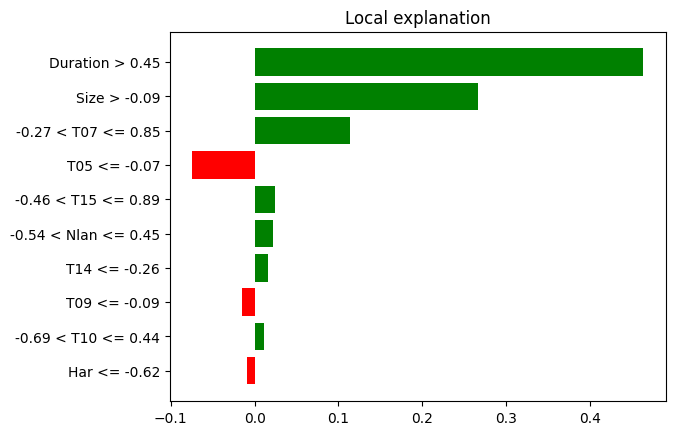

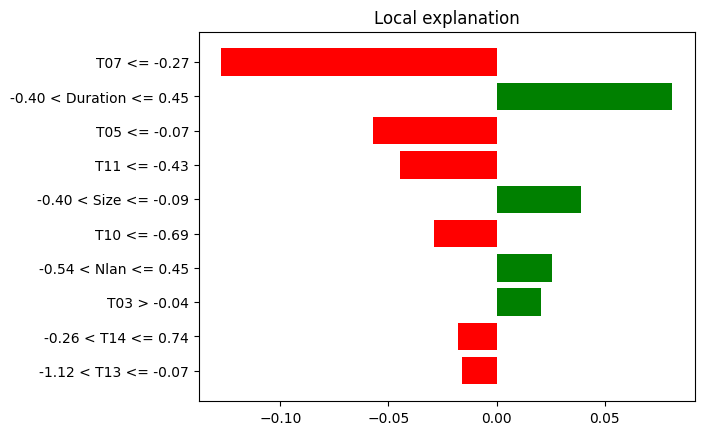

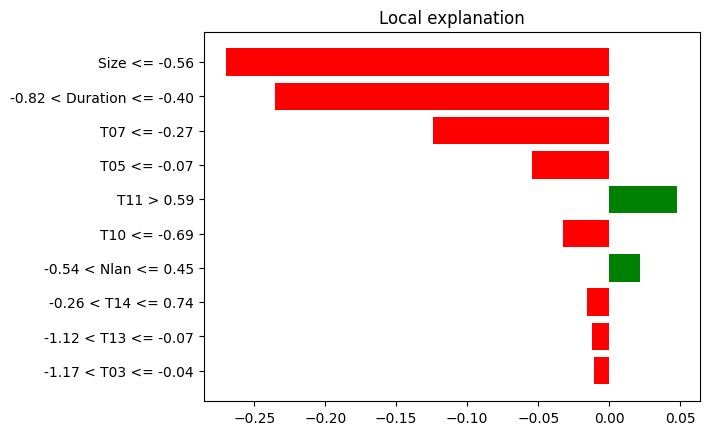

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 26])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(25)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[2, "Variable"] = "T07"
lime_df_max.at[4, "Variable"] = "T15"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T15        4  Positivo
4       T13        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1      Size        2  Positivo
2       T07        3  Positivo
3       T15        4  Positivo
4       T13        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1      Size        2  Positivo
2       T07        3  Positivo
3       T05        4  Negativo
4       T15        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Size', 'Duration', 'T07', 'T15', 'T13']
['Duration', 'Size', 'T07', 'T15', 'T13']
['Duration', 'Size', 'T07', 'T05', 'T15']
['T15', 'T13', 'Duration', 'T05', 'T07', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T15         4  Positivo       4  Positivo       5  Positivo
1       T13         5  Positivo       5  Positivo       -         -
2  Duration         2  Positivo       1  Positivo       1  Positivo
3       T05         -         -       -         -       4  Negativo
4       T07         3  Positivo       3  Positivo       3  Positivo
5      Size         1  Positivo       2  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "T15", "T13", "T05"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Positivo       2  Positivo       2  Positivo
Duration         2  Positivo       1  Positivo       1  Positivo
T07              3  Positivo       3  Positivo       3  Positivo
T15              4  Positivo       4  Positivo       5  Positivo
T13              5  Positivo       5  Positivo       -         -
T05              -         -       -         -       4  Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 26])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(25)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"] = "Duration"
lime_df_median.at[4, "Variable"] = "Size"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Negativo
2      Size        3  Positivo
3       T10        4  Negativo
4      Nlan        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1       T07        2  Negativo
2      Size        3  Positivo
3       T10        4  Negativo
4      Nlan        5  Positivo
   Variable  Ranking     Signo
0       T07        1  Negativo
1  Duration        2  Positivo
2       T05        3  Negativo
3       T11        4  Negativo
4      Size        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Duration', 'T07', 'Size', 'T10', 'Nlan']
['Duration', 'T07', 'Size', 'T10', 'Nlan']
['T07', 'Duration', 'T05', 'T11', 'Size']
['Duration', 'T11', 'T05', 'T10', 'T07', 'Nlan', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0  Duration         1  Positivo       1  Positivo       2  Positivo
1       T11         -         -       -         -       4  Negativo
2       T05         -         -       -         -       3  Negativo
3       T10         4  Negativo       4  Negativo       -         -
4       T07         2  Negativo       2  Negativo       1  Negativo
5      Nlan         5  Positivo       5  Positivo       -         -
6      Size         3  Positivo       3  Positivo       5  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Duration", "T07", "Size", "T10", "Nlan", "T05", "T11"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Duration         1  Positivo       1  Positivo       2  Positivo
T07              2  Negativo       2  Negativo       1  Negativo
Size             3  Positivo       3  Positivo       5  Positivo
T10              4  Negativo       4  Negativo       -         -
Nlan             5  Positivo       5  Positivo       -         -
T05              -         -       -         -       3  Negativo
T11              -         -       -         -       4  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 26])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(25)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[1, "Variable"] = "Duration"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       T11        4  Positivo
4       T06        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T11        3  Positivo
3       T07        4  Negativo
4       T06        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       T05        4  Negativo
4       T11        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Size', 'Duration', 'T07', 'T11', 'T06']
['Size', 'Duration', 'T11', 'T07', 'T06']
['Size', 'Duration', 'T07', 'T05', 'T11']
['Duration', 'T11', 'T05', 'T07', 'Size', 'T06']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0  Duration         2  Negativo       2  Negativo       2  Negativo
1       T11         4  Positivo       3  Positivo       5  Positivo
2       T05         -         -       -         -       4  Negativo
3       T07         3  Negativo       4  Negativo       3  Negativo
4      Size         1  Negativo       1  Negativo       1  Negativo
5       T06         5  Negativo       5  Negativo       -         -

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "T11", "T06", "T05"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Negativo       1  Negativo       1  Negativo
Duration         2  Negativo       2  Negativo       2  Negativo
T07              3  Negativo       4  Negativo       3  Negativo
T11              4  Positivo       3  Positivo       5  Positivo
T06              5  Negativo       5  Negativo       -         -
T05              -         -       -         -       4  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Size', 1), ('Duration', 2), ('T07', 3), ('T15', 4), ('T13', 5), ('Duration', 1), ('T07', 2), ('Size', 3), ('T10', 4), ('Nlan', 5), ('Size', 1), ('Duration', 2), ('T07', 3), ('T11', 4), ('T06', 5)], 'Shapley': [('Size', 2), ('Duration', 1), ('T07', 3), ('T15', 4), ('T13', 5), ('Duration', 1), ('T07', 2), ('Size', 3), ('T10', 4), ('Nlan', 5), ('Size', 1), ('Duration', 2), ('T07', 4), ('T11', 3), ('T06', 5)], 'Lime': [('Size', 2), ('Duration', 1), ('T07', 3), ('T15', 5), ('T05', 4), ('Duration', 2), ('T07', 1), ('Size', 5), ('T05', 3), ('T11', 4), ('Size', 1), ('Duration', 2), ('T07', 3), ('T11', 5), ('T05', 4)]}
{'Breakdown': {'Size': 3, 'Duration': 3, 'T07': 3, 'T15': 1, 'T13': 1, 'T10': 1, 'Nlan': 1, 'T11': 1, 'T06': 1}, 'Shapley': {'Size': 3, 'Duration': 3, 'T07': 3, 'T15': 1, 'T13': 1, 'T10': 1, 'Nlan': 1, 'T11': 1, 'T06': 1}, 'Lime': {'Size': 3, 'Duration': 3, 'T07': 3, 'T15': 1, 'T05': 3, 'T11': 2}}
{'Breakdown': {'Size': 1.6666666666666667, 'Duration': 1.666666666

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_gbr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_gbr

Breakdown              Shapley                 Lime       
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
T06                5.0      1           5.0      1             -      -
Size          1.666667      3           2.0      3      2.666667      3
Nlan               5.0      1           5.0      1             -      -
T07           2.666667      3           3.0      3      2.333333      3
T10                4.0      1           4.0      1             -      -
T05                  -      -             -      -      3.666667      3
T11                4.0      1           3.0      1           4.5      2
Duration      1.666667      3      1.333333      3      1.666667      3
T13                5.0      1           5.0      1             -      -
T15                4.0      1           4.0      1           5.0      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_gbr[("General", "Conteo Total")] = df_resumen_gbr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_gbr

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
T06                5.0      1           5.0      1             -      -   
Size          1.666667      3           2.0      3      2.666667      3   
Nlan               5.0      1           5.0      1             -      -   
T07           2.666667      3           3.0      3      2.333333      3   
T10                4.0      1           4.0      1             -      -   
T05                  -      -             -      -      3.666667      3   
T11                4.0      1           3.0      1           4.5      2   
Duration      1.666667      3      1.333333      3      1.666667      3   
T13                5.0      1           5.0      1             -      -   
T15                4.0      1           4.0      1           5.0      1   

           General               
           Ranking Conteo Total  
T06       5.000000            2  
Size      2.111111            9  
Nlan      5.000000            2  
T07       2.666667            9  
T10       4.000000            2  
T05       3.666667            3  
T11       3.833333            4  
Duration  1.555556            9  
T13       5.000000            2  
T15       4.333333            3

In [ ]:
# Obtener el número de características
num_caract = df_resumen_gbr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_gbr[("General", "Peso Rango")] = 1 - ((df_resumen_gbr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_gbr[("General", "Peso Conteo")] = df_resumen_gbr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_gbr[("General", "Puntaje")] = df_resumen_gbr[("General", "Peso Rango")] + df_resumen_gbr[("General", "Peso Conteo")]
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_gbr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_gbr

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
T06                5.0      1           5.0      1             -      -   
Size          1.666667      3           2.0      3      2.666667      3   
Nlan               5.0      1           5.0      1             -      -   
T07           2.666667      3           3.0      3      2.333333      3   
T10                4.0      1           4.0      1             -      -   
T05                  -      -             -      -      3.666667      3   
T11                4.0      1           3.0      1           4.5      2   
Duration      1.666667      3      1.333333      3      1.666667      3   
T13                5.0      1           5.0      1             -      -   
T15                4.0      1           4.0      1           5.0      1   

         General               
         Ranking Conteo Total  
T06          8.0            2  
Size         2.0            9  
Nlan         8.0            2  
T07          3.0            9  
T10          7.0            2  
T05          5.0            3  
T11          4.0            4  
Duration     1.0            9  
T13          8.0            2  
T15          6.0            3

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_gbr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_gbr = df_resumen_gbr[new_columns]

In [ ]:
df_resumen_gbr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_gbr[(tech, "Ranking Medio")] = df_resumen_gbr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_gbr

General                  Breakdown              Shapley         \
         Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Duration     1.0            9          1.67      3          1.33      3   
Size         2.0            9          1.67      3          2.00      3   
T07          3.0            9          2.67      3          3.00      3   
T11          4.0            4          4.00      1          3.00      1   
T05          5.0            3             -      -             -      -   
T15          6.0            3          4.00      1          4.00      1   
T10          7.0            2          4.00      1          4.00      1   
T06          8.0            2          5.00      1          5.00      1   
Nlan         8.0            2          5.00      1          5.00      1   
T13          8.0            2          5.00      1          5.00      1   

                  Lime         
         Ranking Medio Conteo  
Duration          1.67      3  
Size              2.67      3  
T07               2.33      3  
T11               4.50      2  
T05               3.67      3  
T15               5.00      1  
T10                  -      -  
T06                  -      -  
Nlan                 -      -  
T13                  -      -

## **Voting:**

**FEATURE IMPORTANCE:**

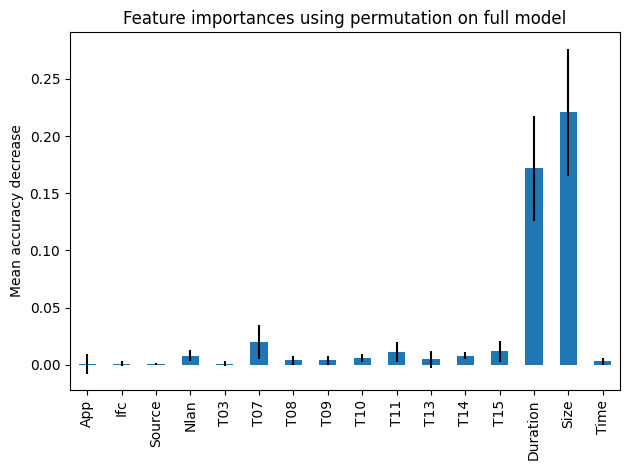

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

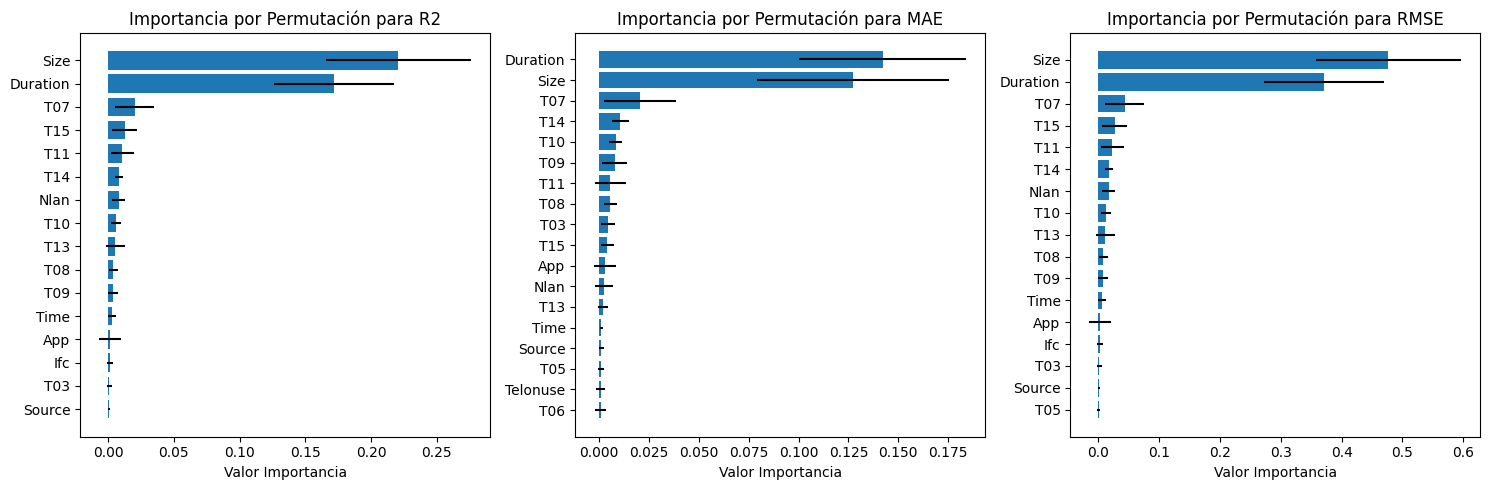

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_vot = {}

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_vot[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_vot['df_global_R2']

,Feature,Importance_Mean,Importance_Std
14,Size,0.220900,0.055471
13,Duration,0.171989,0.045830
5,T07,0.020217,0.014832
12,T15,0.012451,0.009260
9,T11,0.010588,0.008672
11,T14,0.008406,0.003119
3,Nlan,0.008123,0.004871
8,T10,0.005911,0.003744
10,T13,0.005397,0.007375
6,T08,0.004026,0.003773


In [ ]:
results_global_vot['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
15,Duration,0.142126,0.042042
16,Size,0.127470,0.048120
7,T07,0.020532,0.018058
13,T14,0.010425,0.004293
10,T10,0.008135,0.003296
9,T09,0.007722,0.006320
11,T11,0.005530,0.007916
8,T08,0.005466,0.003203
4,T03,0.004326,0.003351
14,T15,0.004029,0.003096


In [ ]:
results_global_vot['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
15,Size,0.477068,0.119799
14,Duration,0.371437,0.098978
6,T07,0.043662,0.032031
13,T15,0.026891,0.019999
10,T11,0.022866,0.018730
12,T14,0.018154,0.006737
3,Nlan,0.017542,0.010519
9,T10,0.012765,0.008087
11,T13,0.011655,0.015927
7,T08,0.008694,0.008149


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_voting, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 43 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 43 values
  -> model_class       : sklearn.ensemble._voting.VotingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7ed55b832e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.694, mean = -0.197, max = 1.25
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.205, mean = 0.0356, max = 1.75
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  8
El valor máximo obtenido es:  1.2022498928825096
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  11
El valor mínimo obtenido es:  -0.6291288723044373
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  3
El valor de la mediana es:  -0.03827650904564168


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

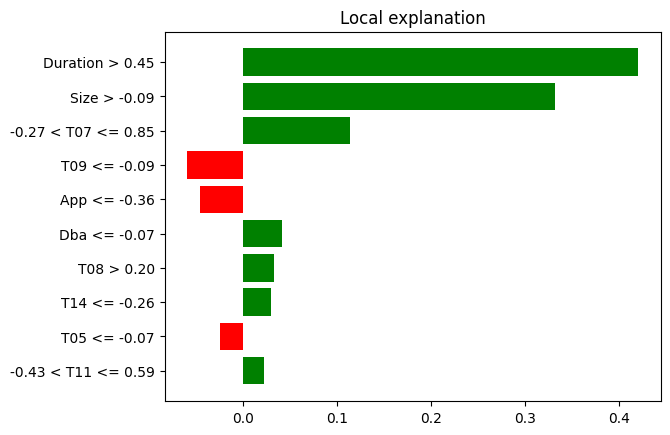

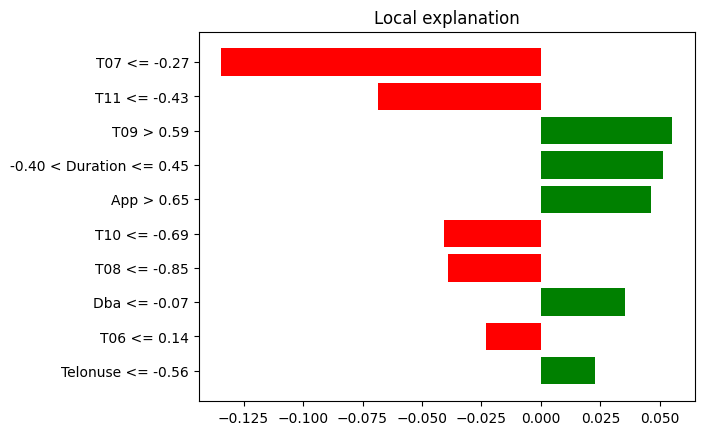

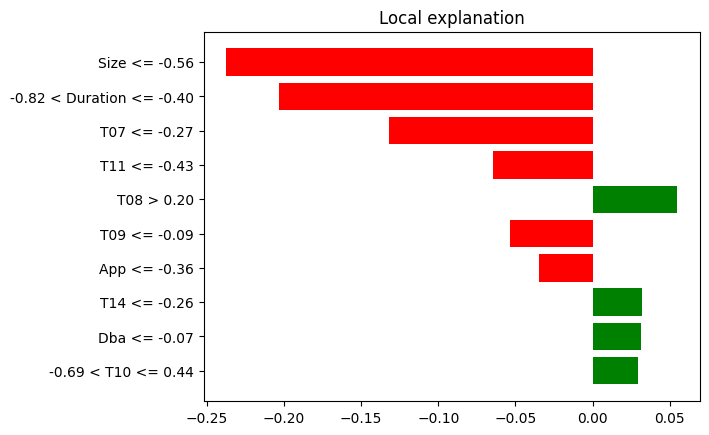

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 26])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(25)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[2, "Variable"] = "T07"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T15        4  Positivo
4       T13        5  Positivo
   Variable  Ranking     Signo
0      Size        1  Positivo
1  Duration        2  Positivo
2       T07        3  Positivo
3       T15        4  Positivo
4       T11        5  Positivo
   Variable  Ranking     Signo
0  Duration        1  Positivo
1      Size        2  Positivo
2       T07        3  Positivo
3       T09        4  Negativo
4       App        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Size', 'Duration', 'T07', 'T15', 'T13']
['Size', 'Duration', 'T07', 'T15', 'T11']
['Duration', 'Size', 'T07', 'T09', 'App']
['T15', 'T13', 'T09', 'Duration', 'T11', 'App', 'T07', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T15         4  Positivo       4  Positivo       -         -
1       T13         5  Positivo       -         -       -         -
2       T09         -         -       -         -       4  Negativo
3  Duration         2  Positivo       2  Positivo       1  Positivo
4       T11         -         -       5  Positivo       -         -
5       App         -         -       -         -       5  Negativo
6       T07         3  Positivo       3  Positivo       3  Positivo
7      Size         1  Positivo       1  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "T15", "T13", "T11", "T09", "App"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Positivo       1  Positivo       2  Positivo
Duration         2  Positivo       2  Positivo       1  Positivo
T07              3  Positivo       3  Positivo       3  Positivo
T15              4  Positivo       4  Positivo       -         -
T13              5  Positivo       -         -       -         -
T11              -         -       5  Positivo       -         -
T09              -         -       -         -       4  Negativo
App              -         -       -         -       5  Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 26])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(25)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[3, "Variable"] = "Duration"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

   Variable  Ranking     Signo
0  Duration        1  Positivo
1       App        2  Positivo
2       T07        3  Negativo
3       T09        4  Positivo
4       Har        5  Positivo
   Variable  Ranking     Signo
0       App        1  Positivo
1  Duration        2  Positivo
2       T07        3  Negativo
3       T09        4  Positivo
4       Har        5  Positivo
   Variable  Ranking     Signo
0       T07        1  Negativo
1       T11        2  Negativo
2       T09        3  Positivo
3  Duration        4  Positivo
4       App        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Duration', 'App', 'T07', 'T09', 'Har']
['App', 'Duration', 'T07', 'T09', 'Har']
['T07', 'T11', 'T09', 'Duration', 'App']
['T09', 'Duration', 'T11', 'App', 'T07', 'Har']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T09         4  Positivo       4  Positivo       3  Positivo
1  Duration         1  Positivo       2  Positivo       4  Positivo
2       T11         -         -       -         -       2  Negativo
3       App         2  Positivo       1  Positivo       5  Positivo
4       T07         3  Negativo       3  Negativo       1  Negativo
5       Har         5  Positivo       5  Positivo       -         -

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Duration", "App", "T07", "T09", "Har", "T11"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Duration         1  Positivo       2  Positivo       4  Positivo
App              2  Positivo       1  Positivo       5  Positivo
T07              3  Negativo       3  Negativo       1  Negativo
T09              4  Positivo       4  Positivo       3  Positivo
Har              5  Positivo       5  Positivo       -         -
T11              -         -       -         -       2  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 26])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(25)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[1, "Variable"] = "Duration"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       T09        4  Negativo
4       App        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       App        4  Negativo
4       T09        5  Negativo
   Variable  Ranking     Signo
0      Size        1  Negativo
1  Duration        2  Negativo
2       T07        3  Negativo
3       T11        4  Negativo
4       T08        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Size', 'Duration', 'T07', 'T09', 'App']
['Size', 'Duration', 'T07', 'App', 'T09']
['Size', 'Duration', 'T07', 'T11', 'T08']
['T09', 'Duration', 'T11', 'App', 'T07', 'T08', 'Size']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       T09         4  Negativo       5  Negativo       -         -
1  Duration         2  Negativo       2  Negativo       2  Negativo
2       T11         -         -       -         -       4  Negativo
3       App         5  Negativo       4  Negativo       -         -
4       T07         3  Negativo       3  Negativo       3  Negativo
5       T08         -         -       -         -       5  Positivo
6      Size         1  Negativo       1  Negativo       1  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Size", "Duration", "T07", "T09", "App", "T11", "T08"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Size             1  Negativo       1  Negativo       1  Negativo
Duration         2  Negativo       2  Negativo       2  Negativo
T07              3  Negativo       3  Negativo       3  Negativo
T09              4  Negativo       5  Negativo       -         -
App              5  Negativo       4  Negativo       -         -
T11              -         -       -         -       4  Negativo
T08              -         -       -         -       5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Size', 1), ('Duration', 2), ('T07', 3), ('T15', 4), ('T13', 5), ('Duration', 1), ('App', 2), ('T07', 3), ('T09', 4), ('Har', 5), ('Size', 1), ('Duration', 2), ('T07', 3), ('T09', 4), ('App', 5)], 'Shapley': [('Size', 1), ('Duration', 2), ('T07', 3), ('T15', 4), ('T11', 5), ('Duration', 2), ('App', 1), ('T07', 3), ('T09', 4), ('Har', 5), ('Size', 1), ('Duration', 2), ('T07', 3), ('T09', 5), ('App', 4)], 'Lime': [('Size', 2), ('Duration', 1), ('T07', 3), ('T09', 4), ('App', 5), ('Duration', 4), ('App', 5), ('T07', 1), ('T09', 3), ('T11', 2), ('Size', 1), ('Duration', 2), ('T07', 3), ('T11', 4), ('T08', 5)]}
{'Breakdown': {'Size': 2, 'Duration': 3, 'T07': 3, 'T15': 1, 'T13': 1, 'App': 2, 'T09': 2, 'Har': 1}, 'Shapley': {'Size': 2, 'Duration': 3, 'T07': 3, 'T15': 1, 'T11': 1, 'App': 2, 'T09': 2, 'Har': 1}, 'Lime': {'Size': 2, 'Duration': 3, 'T07': 3, 'T09': 2, 'App': 2, 'T11': 2, 'T08': 1}}
{'Breakdown': {'Size': 1.0, 'Duration': 1.6666666666666667, 'T07': 3.0, 'T15': 4.0,

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_vot = pd.DataFrame(data_dict, index=all_caract)

df_resumen_vot

Breakdown              Shapley                 Lime       
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Size               1.0      2           1.0      2           1.5      2
Har                5.0      1           5.0      1             -      -
T08                  -      -             -      -           5.0      1
T07                3.0      3           3.0      3      2.333333      3
App                3.5      2           2.5      2           5.0      2
T11                  -      -           5.0      1           3.0      2
Duration      1.666667      3           2.0      3      2.333333      3
T09                4.0      2           4.5      2           3.5      2
T13                5.0      1             -      -             -      -
T15                4.0      1           4.0      1             -      -

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_vot[("General", "Conteo Total")] = df_resumen_vot[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_vot

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Size               1.0      2           1.0      2           1.5      2   
Har                5.0      1           5.0      1             -      -   
T08                  -      -             -      -           5.0      1   
T07                3.0      3           3.0      3      2.333333      3   
App                3.5      2           2.5      2           5.0      2   
T11                  -      -           5.0      1           3.0      2   
Duration      1.666667      3           2.0      3      2.333333      3   
T09                4.0      2           4.5      2           3.5      2   
T13                5.0      1             -      -             -      -   
T15                4.0      1           4.0      1             -      -   

           General               
           Ranking Conteo Total  
Size      1.166667            6  
Har       5.000000            2  
T08       5.000000            1  
T07       2.777778            9  
App       3.666667            6  
T11       4.000000            3  
Duration  2.000000            9  
T09       4.000000            6  
T13       5.000000            1  
T15       4.000000            2

In [ ]:
# Obtener el número de características
num_caract = df_resumen_vot.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_vot[("General", "Peso Rango")] = 1 - ((df_resumen_vot[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_vot[("General", "Peso Conteo")] = df_resumen_vot[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_vot[("General", "Puntaje")] = df_resumen_vot[("General", "Peso Rango")] + df_resumen_vot[("General", "Peso Conteo")]
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_vot.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_vot

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Size               1.0      2           1.0      2           1.5      2   
Har                5.0      1           5.0      1             -      -   
T08                  -      -             -      -           5.0      1   
T07                3.0      3           3.0      3      2.333333      3   
App                3.5      2           2.5      2           5.0      2   
T11                  -      -           5.0      1           3.0      2   
Duration      1.666667      3           2.0      3      2.333333      3   
T09                4.0      2           4.5      2           3.5      2   
T13                5.0      1             -      -             -      -   
T15                4.0      1           4.0      1             -      -   

         General               
         Ranking Conteo Total  
Size         3.0            6  
Har          8.0            2  
T08          9.0            1  
T07          2.0            9  
App          4.0            6  
T11          6.0            3  
Duration     1.0            9  
T09          5.0            6  
T13          9.0            1  
T15          7.0            2

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_vot.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_vot = df_resumen_vot[new_columns]

In [ ]:
df_resumen_vot.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_vot[(tech, "Ranking Medio")] = df_resumen_vot[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_vot

General                  Breakdown              Shapley         \
         Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Duration     1.0            9          1.67      3          2.00      3   
T07          2.0            9          3.00      3          3.00      3   
Size         3.0            6          1.00      2          1.00      2   
App          4.0            6          3.50      2          2.50      2   
T09          5.0            6          4.00      2          4.50      2   
T11          6.0            3             -      -          5.00      1   
T15          7.0            2          4.00      1          4.00      1   
Har          8.0            2          5.00      1          5.00      1   
T08          9.0            1             -      -             -      -   
T13          9.0            1          5.00      1             -      -   

                  Lime         
         Ranking Medio Conteo  
Duration          2.33      3  
T07               2.33      3  
Size              1.50      2  
App               5.00      2  
T09               3.50      2  
T11               3.00      2  
T15                  -      -  
Har                  -      -  
T08               5.00      1  
T13                  -      -

## Local Datasets

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)
index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar las columnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

# Formatear los valores
for algo in algorithms:
    df_resumen_final[(algo, "Ranking")] = df_resumen_final[(algo, "Ranking")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
    df_resumen_final[(algo, "Conteo Total")] = df_resumen_final[(algo, "Conteo Total")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final[("Ranking Final")] = df_resumen_final[("Ranking Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
df_resumen_final[("Conteo Final")] = df_resumen_final[("Conteo Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
Duration,2,8,1,9,1,9,1,9,1,35
T07,1,9,3,9,3,9,2,9,2,36
Size,2,6,2,8,2,9,3,6,3,29
T09,4,5,4,3,-,-,5,6,4,14
T11,7,3,5,5,4,4,6,3,5,15
App,7,3,-,-,-,-,4,6,6,9
Nlan,6,2,6,4,8,2,-,-,7,8
T15,-,-,7,1,6,3,7,2,8,6
T05,-,-,7,1,5,3,-,-,9,4
T08,5,6,-,-,-,-,9,1,10,7


In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)

index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final con los índices únicos
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final["Conteo Final"] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")

# Eliminar las subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
Duration,2.0,8.0,1.0,9.0,1.0,9.0,1.0,9.0,1.0,35.0
T07,1.0,9.0,3.0,9.0,3.0,9.0,2.0,9.0,2.0,36.0
Size,2.0,6.0,2.0,8.0,2.0,9.0,3.0,6.0,3.0,29.0
T09,4.0,5.0,4.0,3.0,-,-,5.0,6.0,4.0,14.0
T11,7.0,3.0,5.0,5.0,4.0,4.0,6.0,3.0,5.0,15.0
App,7.0,3.0,-,-,-,-,4.0,6.0,6.0,9.0
Nlan,6.0,2.0,6.0,4.0,8.0,2.0,-,-,7.0,8.0
T15,-,-,7.0,1.0,6.0,3.0,7.0,2.0,8.0,6.0
T05,-,-,7.0,1.0,5.0,3.0,-,-,9.0,4.0
T08,5.0,6.0,-,-,-,-,9.0,1.0,10.0,7.0


# Resultados:

In [ ]:
score_result=score_result.drop("MSE",axis=1)

In [ ]:
score_result

,Modelo,MAE,MSE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.359408,0.539331,0.617687,0.461208,0.340407,0.711458
1,RandomForest,0.325274,0.478963,0.584855,0.354919,0.085708,0.711458
2,GradientBoosting,0.330199,0.505491,0.585041,0.385801,0.060562,0.711458
3,Voting,0.309889,0.482044,0.570434,0.501288,0.080803,0.710417


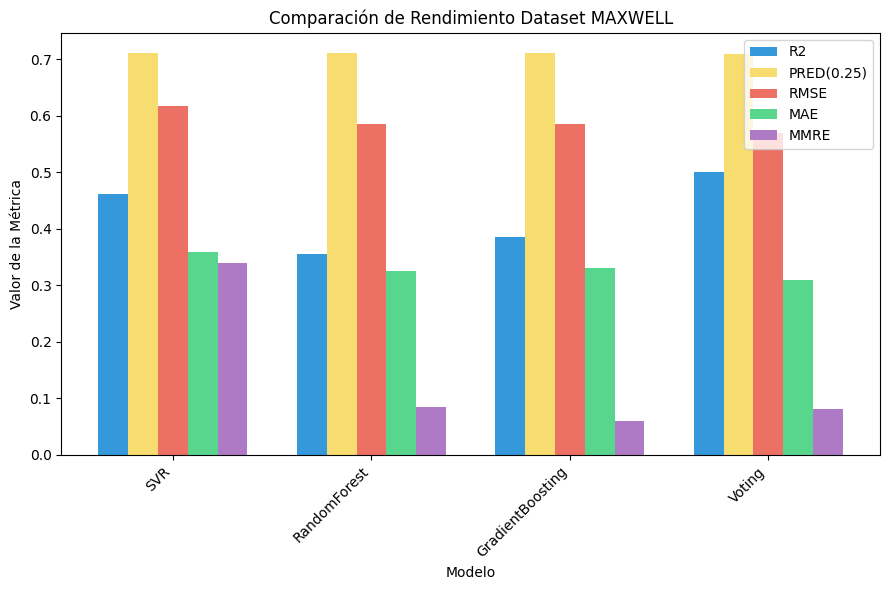

In [ ]:
metricas = ['R2', 'PRED(0.25)', 'RMSE', 'MAE', 'MMRE']
colores = ['#3498DB', '#F7DC6F','#EC7063', '#58D68D', '#AF7AC5']

num_modelos = len(score_result)
ancho_barra = 0.15
x = range(num_modelos)

plt.figure(figsize=(9, 6))

# Crear un gráfico de barras para cada métrica
for i, metrica in enumerate(metricas):
    # Calcular la posición para las barras de esta métrica
    posiciones_x = [pos + i * ancho_barra for pos in x]

    # Obtener los valores de la métrica actual
    valores_metrica = score_result[metrica]

    # Crear las barras para la métrica actual
    plt.bar(
        posiciones_x,
        valores_metrica,
        width=ancho_barra,
        label=metrica,
        color=colores[i],
    )

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Rendimiento Dataset MAXWELL')
plt.xticks([pos + (len(metricas) - 1) * ancho_barra / 2 for pos in x], score_result['Modelo'], rotation=45, ha="right")
plt.legend(loc='upper right')

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

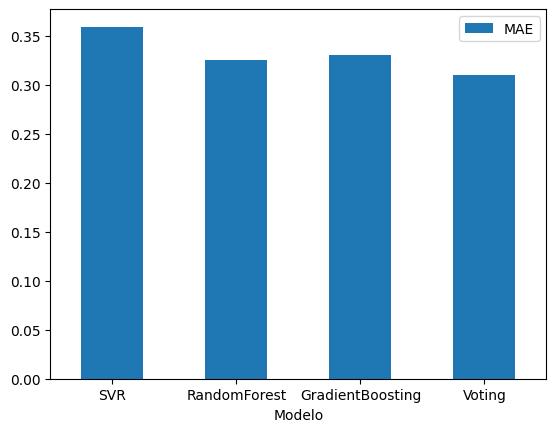

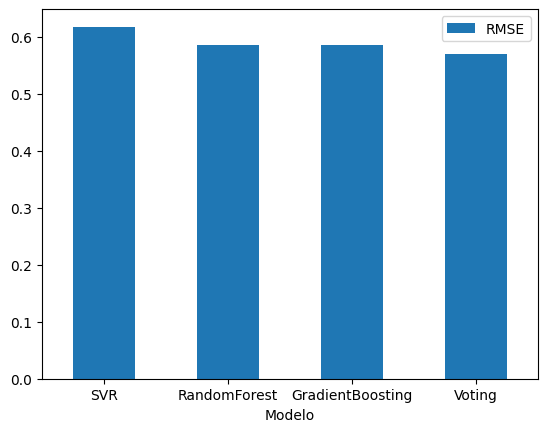

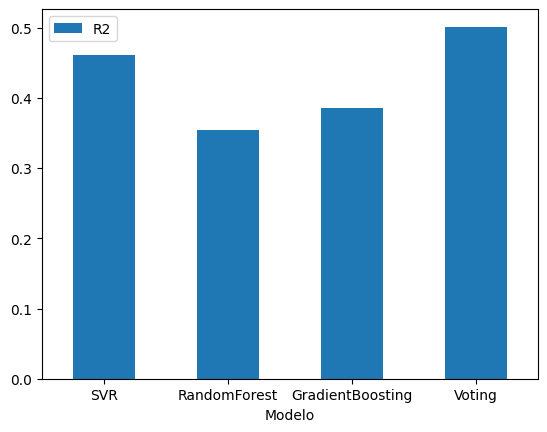

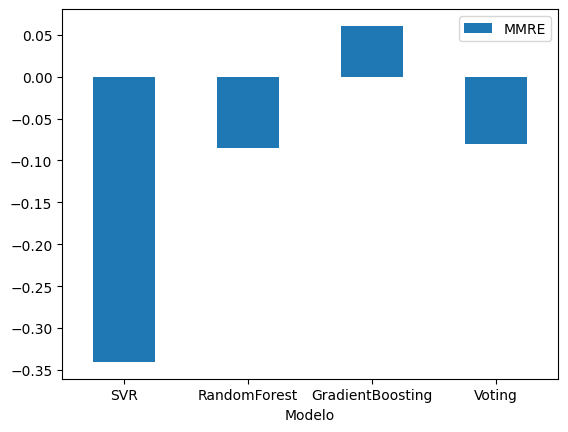

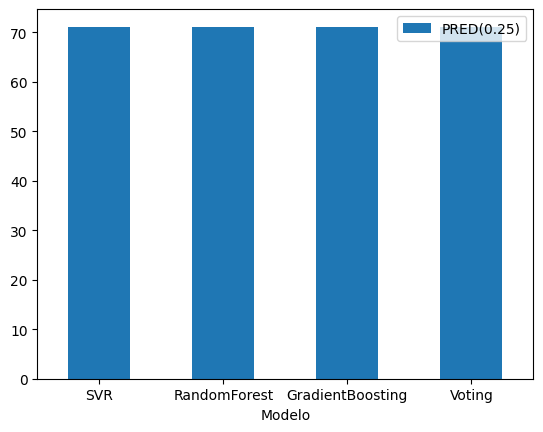

In [ ]:
variables=list(score_result)
variables.pop(0)

for var in variables:
  score_result.plot.bar(x='Modelo', y=var, rot=0)